In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler



warnings.filterwarnings('ignore')

df = pd.read_csv('Life Expectancy Data.csv')

df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [3]:

df.rename(columns = {" BMI " :"BMI", 
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

In [4]:
df.describe()

Year  Life_expectancy  Adult_mortality  Infant_deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  Percentage_expenditure   HepatitisB        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  Under_five_deaths        Polio  Total_expenditure  \
count  2904.000000        2938.000000  2919.000000         2712.00000   
mean     38.321247          42.035739    82.550188            5.93819   
std      20.044034         160.445548    23.428046            2.49832   
min       1.000000           0.000000     3.000000            0.37000   
25%      19.300000           0.000000    78.000000            4.26000   
50%      43.500000           4.000000    93.000000            5.75500   
75%      56.200000          28.000000    97.000000            7.49250   
max      87.300000        2500.000000    99.000000           17.60000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       Thinness_1-19_years  Thinness_5-9_years  \
count          2904.000000         2904.000000   
mean              4.839704            4.870317   
std               4.420195            4.508882   
min               0.100000            0.100000   
25%               1.600000            1.500000   
50%               3.300000            3.300000   
75%               7.200000            7.200000   
max              27.700000           28.600000   

       Income_composition_of_resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_mortality                  2928 non-null   float64
 5   Infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage_expenditure           2938 non-null   float64
 8   HepatitisB                       2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under_five_deaths                2938 non-null   int64  
 12  Polio               

In [6]:
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_mortality                     10
Infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
HepatitisB                         553
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness_1-19_years                 34
Thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64


In [7]:
country_list = df.Country.unique()
fill_list = ['Life_expectancy','Adult_mortality','Alcohol','HepatitisB','BMI','Polio',
             'Total_expenditure','Diphtheria','GDP','Population','Thinness_1-19_years','Thinness_5-9_years',
             'Income_composition_of_resources','Schooling']



In [8]:
for country in country_list:
    df.loc[df['Country'] == country, fill_list] = df.loc[df['Country'] == country, fill_list].interpolate()


df.dropna(inplace=True)

In [14]:
#filling the rest of data with avarage
df = df.fillna(df.mean())
print(df.isna().sum()) #there is no null in df

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_mortality                    0
Infant_deaths                      0
Alcohol                            0
Percentage_expenditure             0
HepatitisB                         0
Measles                            0
BMI                                0
Under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness_1-19_years                0
Thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64


In [201]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_mortality                    0
Infant_deaths                      0
Alcohol                            0
Percentage_expenditure             0
HepatitisB                         0
Measles                            0
BMI                                0
Under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness_1-19_years                0
Thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [15]:
# Detect outliers in each variable using box plots.
columns = df.select_dtypes(include=['number']).columns.tolist()
columns.remove('Year')
columns
# col_dict = {}
# cnt = 0
# for col in columns:
#     cnt += 1
#     col_dict[col] = cnt
    
# col_dict
# plt.figure(figsize=(20,30))

# for variable,i in col_dict.items():
#                      plt.subplot(5,4,i)
#                      plt.boxplot(le[variable],whis=1.5)
#                      plt.title(variable)

# plt.show()

['Life_expectancy',
 'Adult_mortality',
 'Infant_deaths',
 'Alcohol',
 'Percentage_expenditure',
 'HepatitisB',
 'Measles',
 'BMI',
 'Under_five_deaths',
 'Polio',
 'Total_expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Thinness_1-19_years',
 'Thinness_5-9_years',
 'Income_composition_of_resources',
 'Schooling']

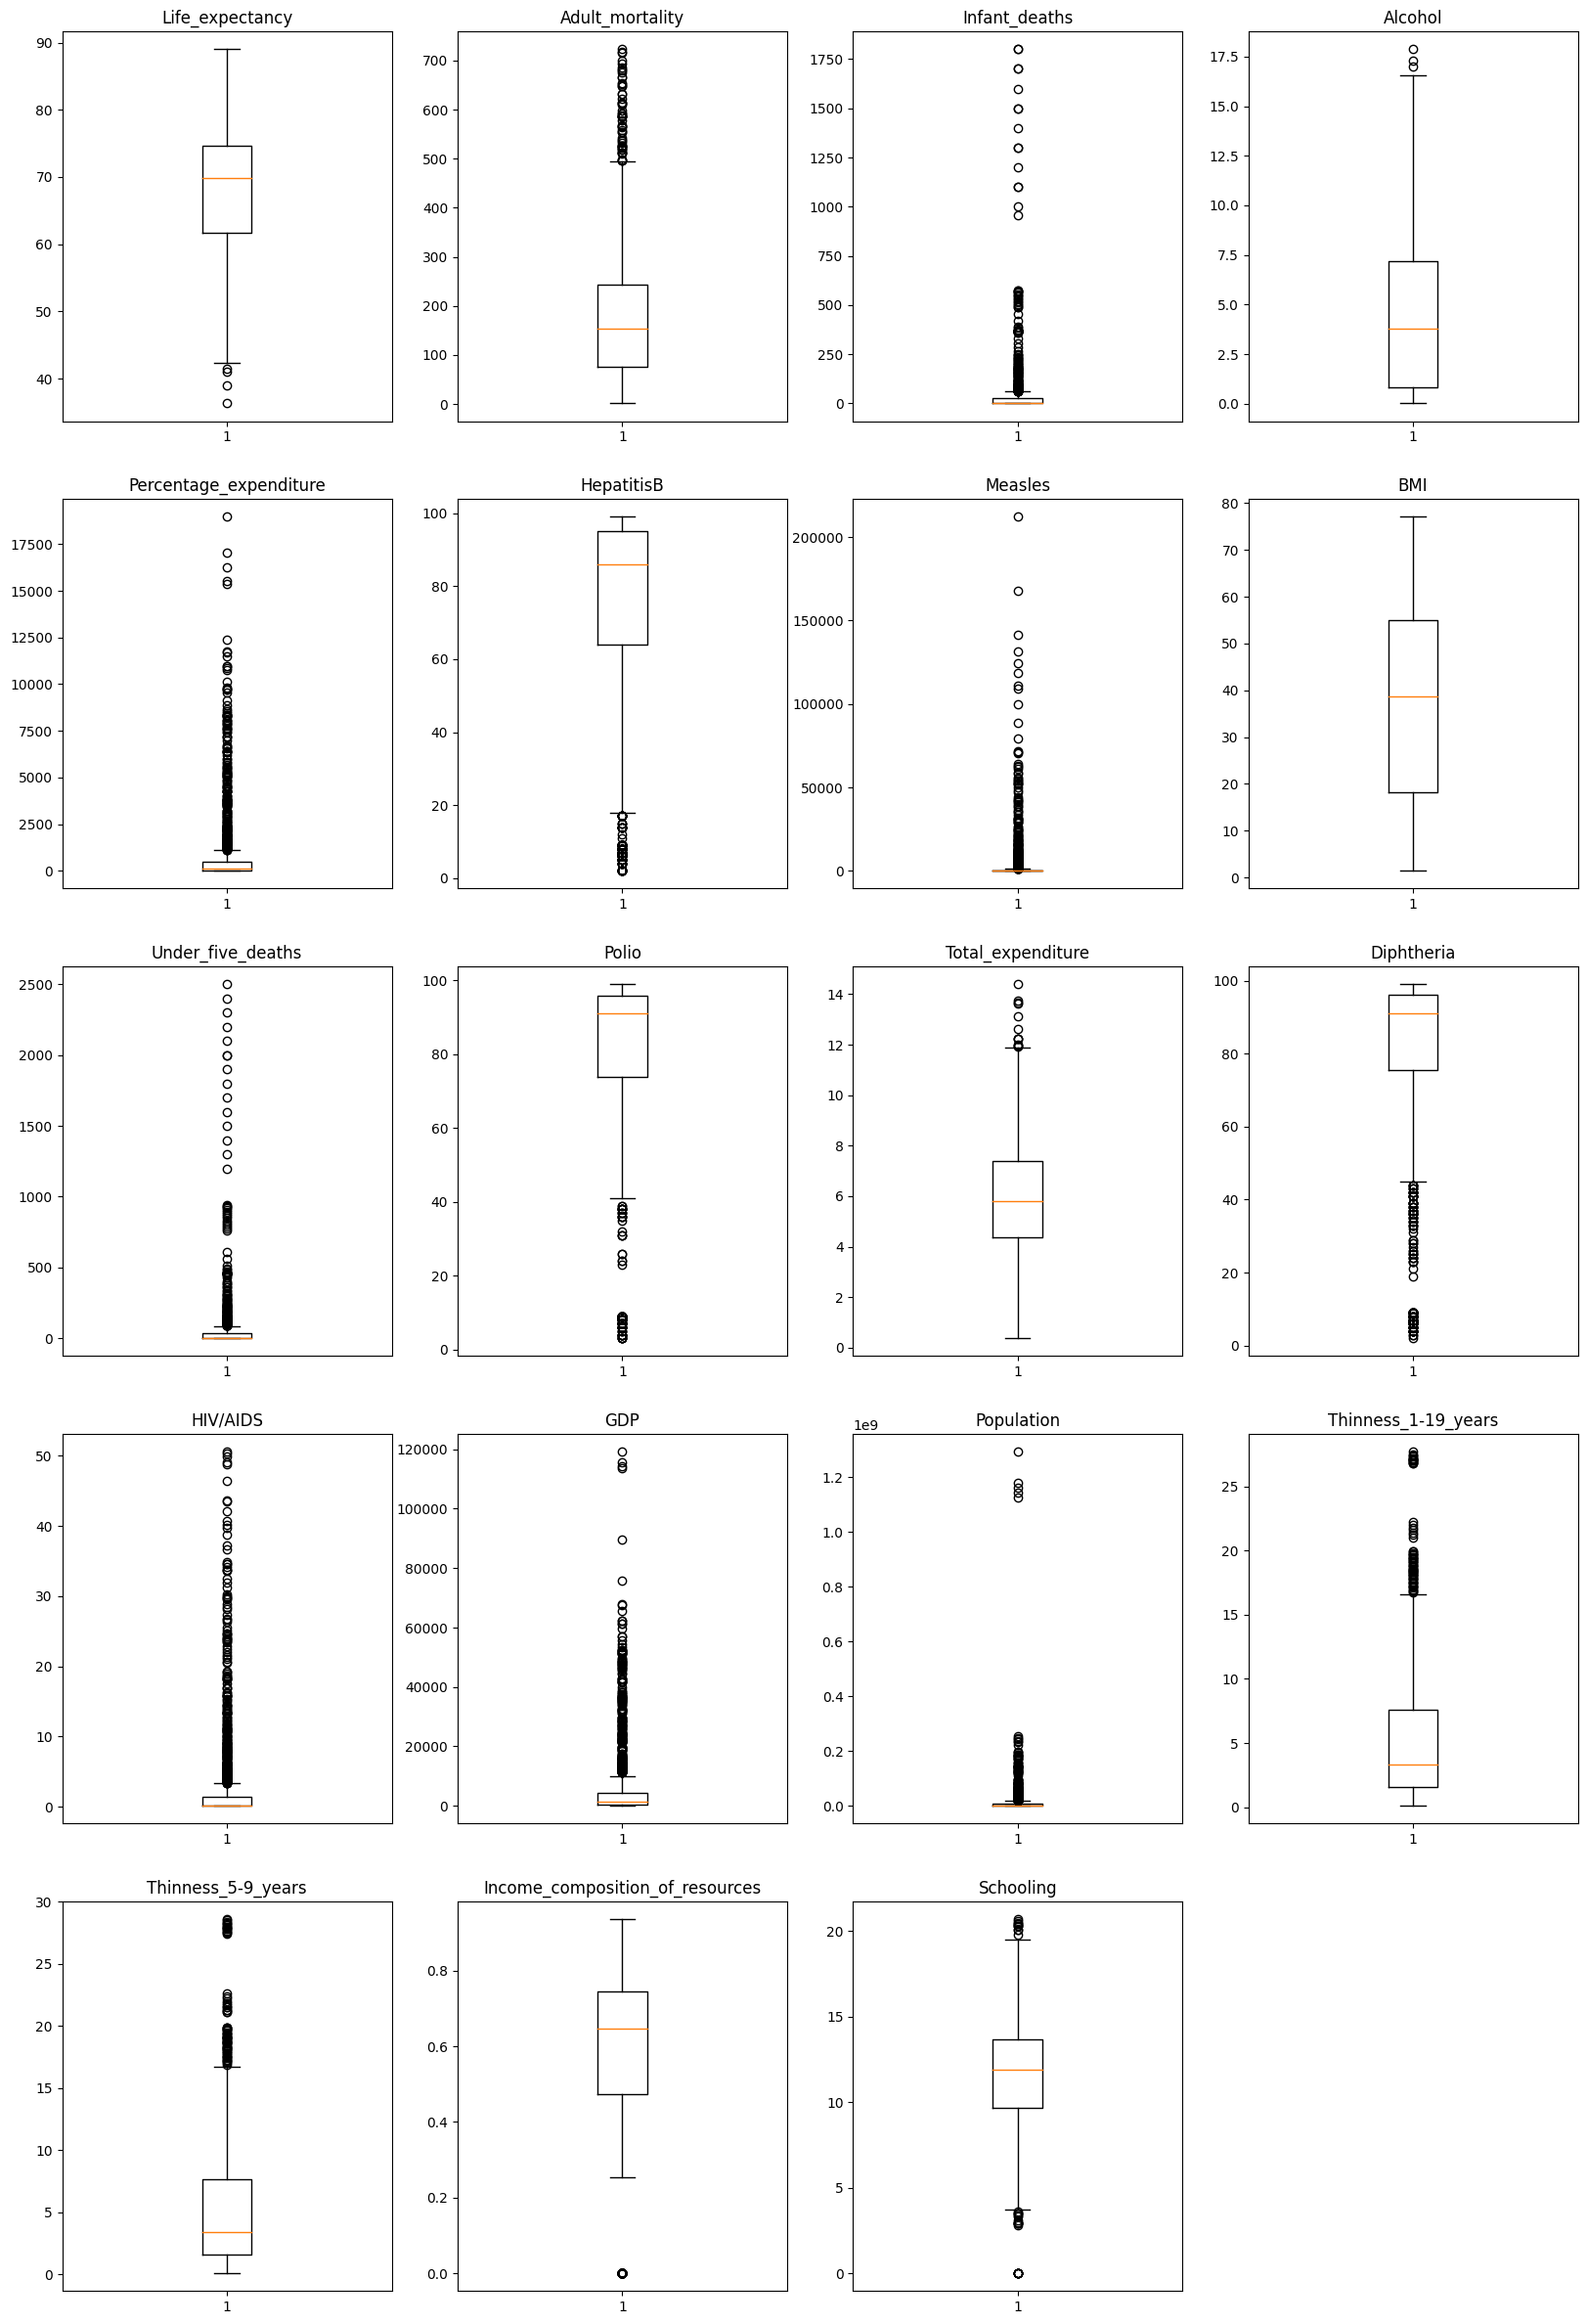

In [16]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [17]:
for variable in columns:
    q75, q25 = np.percentile(df[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    num_outliers = len((np.where((df[variable] > max_val) | (df[variable] < min_val))[0]))
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable, num_outliers,(num_outliers / len(df[variable]) * 100)))

print(num_outliers)

Number of outliers and percentage of it in Life_expectancy : 4 and 0.20130850528434827
Number of outliers and percentage of it in Adult_mortality : 58 and 2.9189733266230498
Number of outliers and percentage of it in Infant_deaths : 198 and 9.96477101157524
Number of outliers and percentage of it in Alcohol : 3 and 0.1509813789632612
Number of outliers and percentage of it in Percentage_expenditure : 232 and 11.675893306492199
Number of outliers and percentage of it in HepatitisB : 216 and 10.870659285354806
Number of outliers and percentage of it in Measles : 361 and 18.16809260191243
Number of outliers and percentage of it in BMI : 0 and 0.0
Number of outliers and percentage of it in Under_five_deaths : 227 and 11.424257674886764
Number of outliers and percentage of it in Polio : 159 and 8.002013085052843
Number of outliers and percentage of it in Total_expenditure : 13 and 0.6542526421741319
Number of outliers and percentage of it in Diphtheria : 195 and 9.813789632611977
Number of 

In [18]:
# Removing Outliers in the variables using Winsorization technique.
# Winsorize Life_Expectancy
from scipy.stats.mstats import winsorize
df['Life_expectancy'] = winsorize(df['Life_expectancy'],(0.01,0))
df['Adult_mortality'] = winsorize(df['Adult_mortality'],(0,0.03))
df['Infant_deaths'] = winsorize(df['Infant_deaths'],(0,0.10))
df['Alcohol'] = winsorize(df['Alcohol'],(0,0.01))
df['Percentage_expenditure'] = winsorize(df['Percentage_expenditure'],(0,0.12))
df['HepatitisB'] = winsorize(df['HepatitisB'],(0.11,0))
df['Measles'] = winsorize(df['Measles'],(0,0.19))
df['Under_five_deaths'] = winsorize(df['Under_five_deaths'],(0,0.12))
df['Polio'] = winsorize(df['Polio'],(0.09,0))
df['Total_expenditure'] = winsorize(df['Total_expenditure'],(0,0.01))
df['Diphtheria'] = winsorize(df['Diphtheria'],(0.10,0))
df['HIV/AIDS'] = winsorize(df['HIV/AIDS'],(0,0.16))
df['GDP'] = winsorize(df['GDP'],(0,0.13))
df['Population'] = winsorize(df['Population'],(0,0.14))
df['Thinness_1-19_years'] = winsorize(df['Thinness_1-19_years'],(0,0.04))
df['Thinness_5-9_years'] = winsorize(df['Thinness_5-9_years'],(0,0.04))
df['Income_composition_of_resources'] = winsorize(df['Income_composition_of_resources'],(0.05,0))
df['Schooling'] = winsorize(df['Schooling'],(0.02,0.01))


In [19]:
for variable in columns:
    q75, q25 = np.percentile(df[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    num_outliers = len((np.where((df[variable] > max_val) | (df[variable] < min_val))[0]))
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable, num_outliers,(num_outliers / len(df[variable]) * 100)))

Number of outliers and percentage of it in Life_expectancy : 0 and 0.0
Number of outliers and percentage of it in Adult_mortality : 0 and 0.0
Number of outliers and percentage of it in Infant_deaths : 0 and 0.0
Number of outliers and percentage of it in Alcohol : 0 and 0.0
Number of outliers and percentage of it in Percentage_expenditure : 0 and 0.0
Number of outliers and percentage of it in HepatitisB : 0 and 0.0
Number of outliers and percentage of it in Measles : 0 and 0.0
Number of outliers and percentage of it in BMI : 0 and 0.0
Number of outliers and percentage of it in Under_five_deaths : 0 and 0.0
Number of outliers and percentage of it in Polio : 0 and 0.0
Number of outliers and percentage of it in Total_expenditure : 0 and 0.0
Number of outliers and percentage of it in Diphtheria : 0 and 0.0
Number of outliers and percentage of it in HIV/AIDS : 0 and 0.0
Number of outliers and percentage of it in GDP : 0 and 0.0
Number of outliers and percentage of it in Population : 0 and 0.

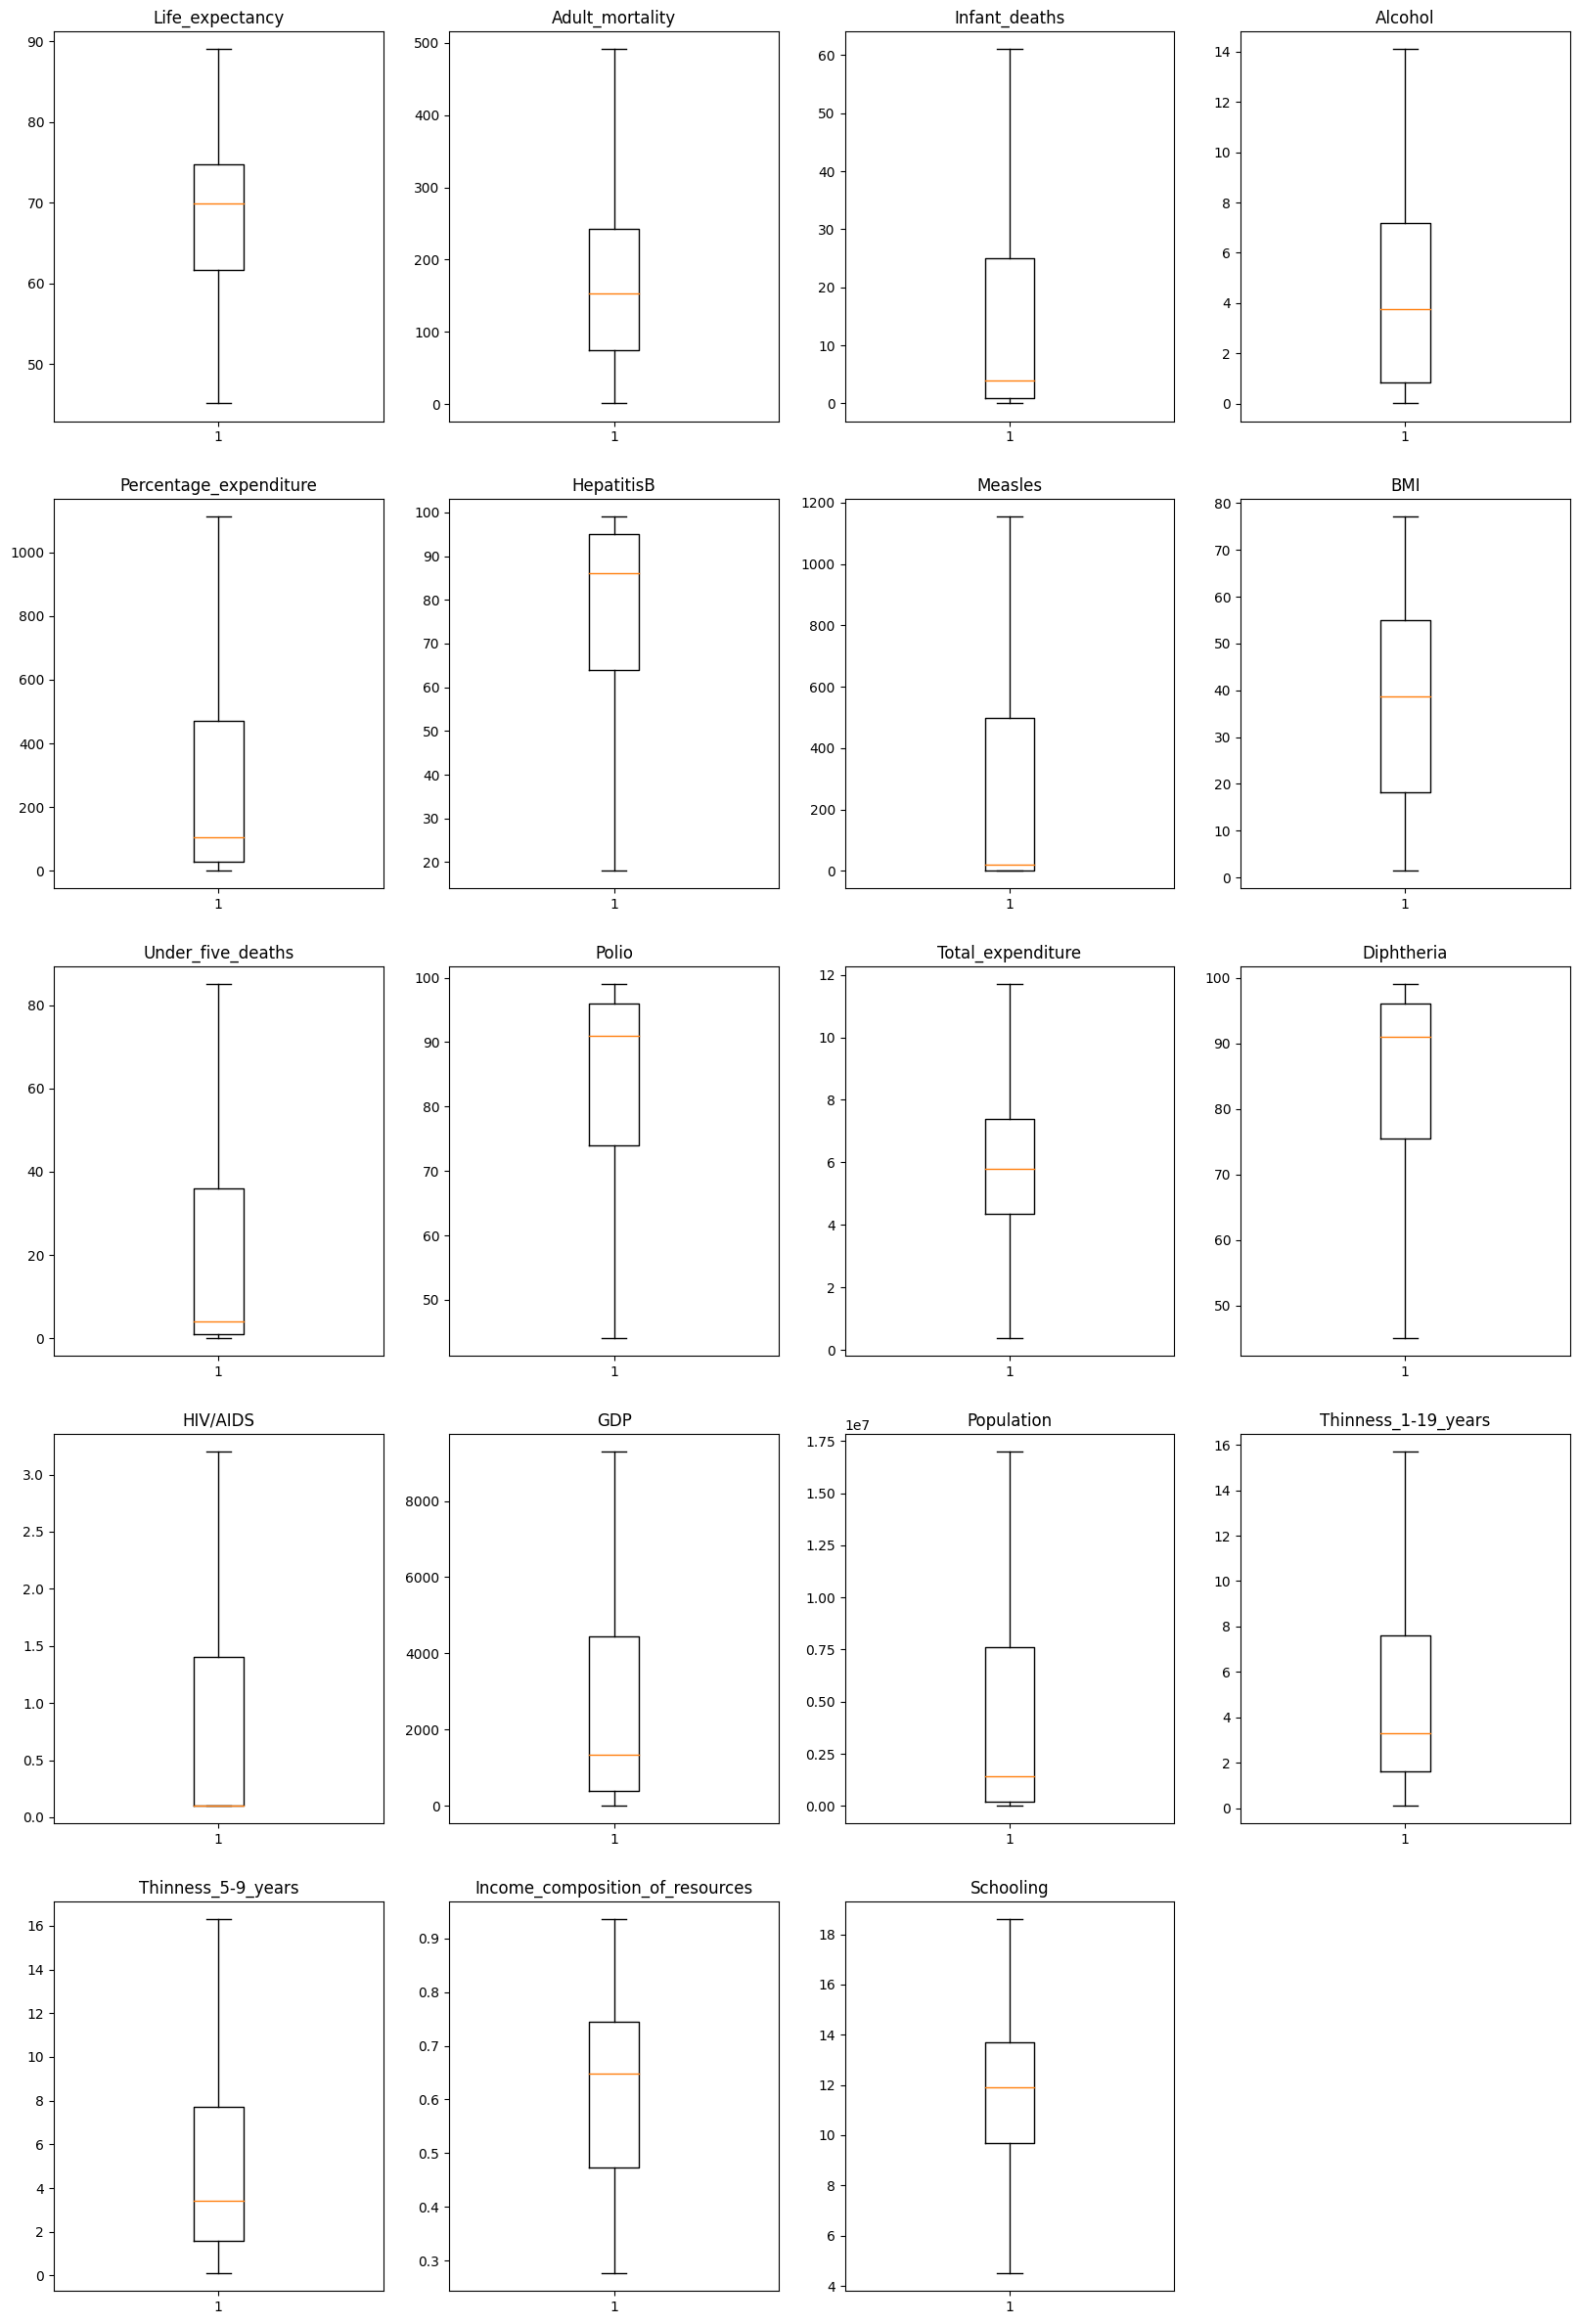

In [20]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

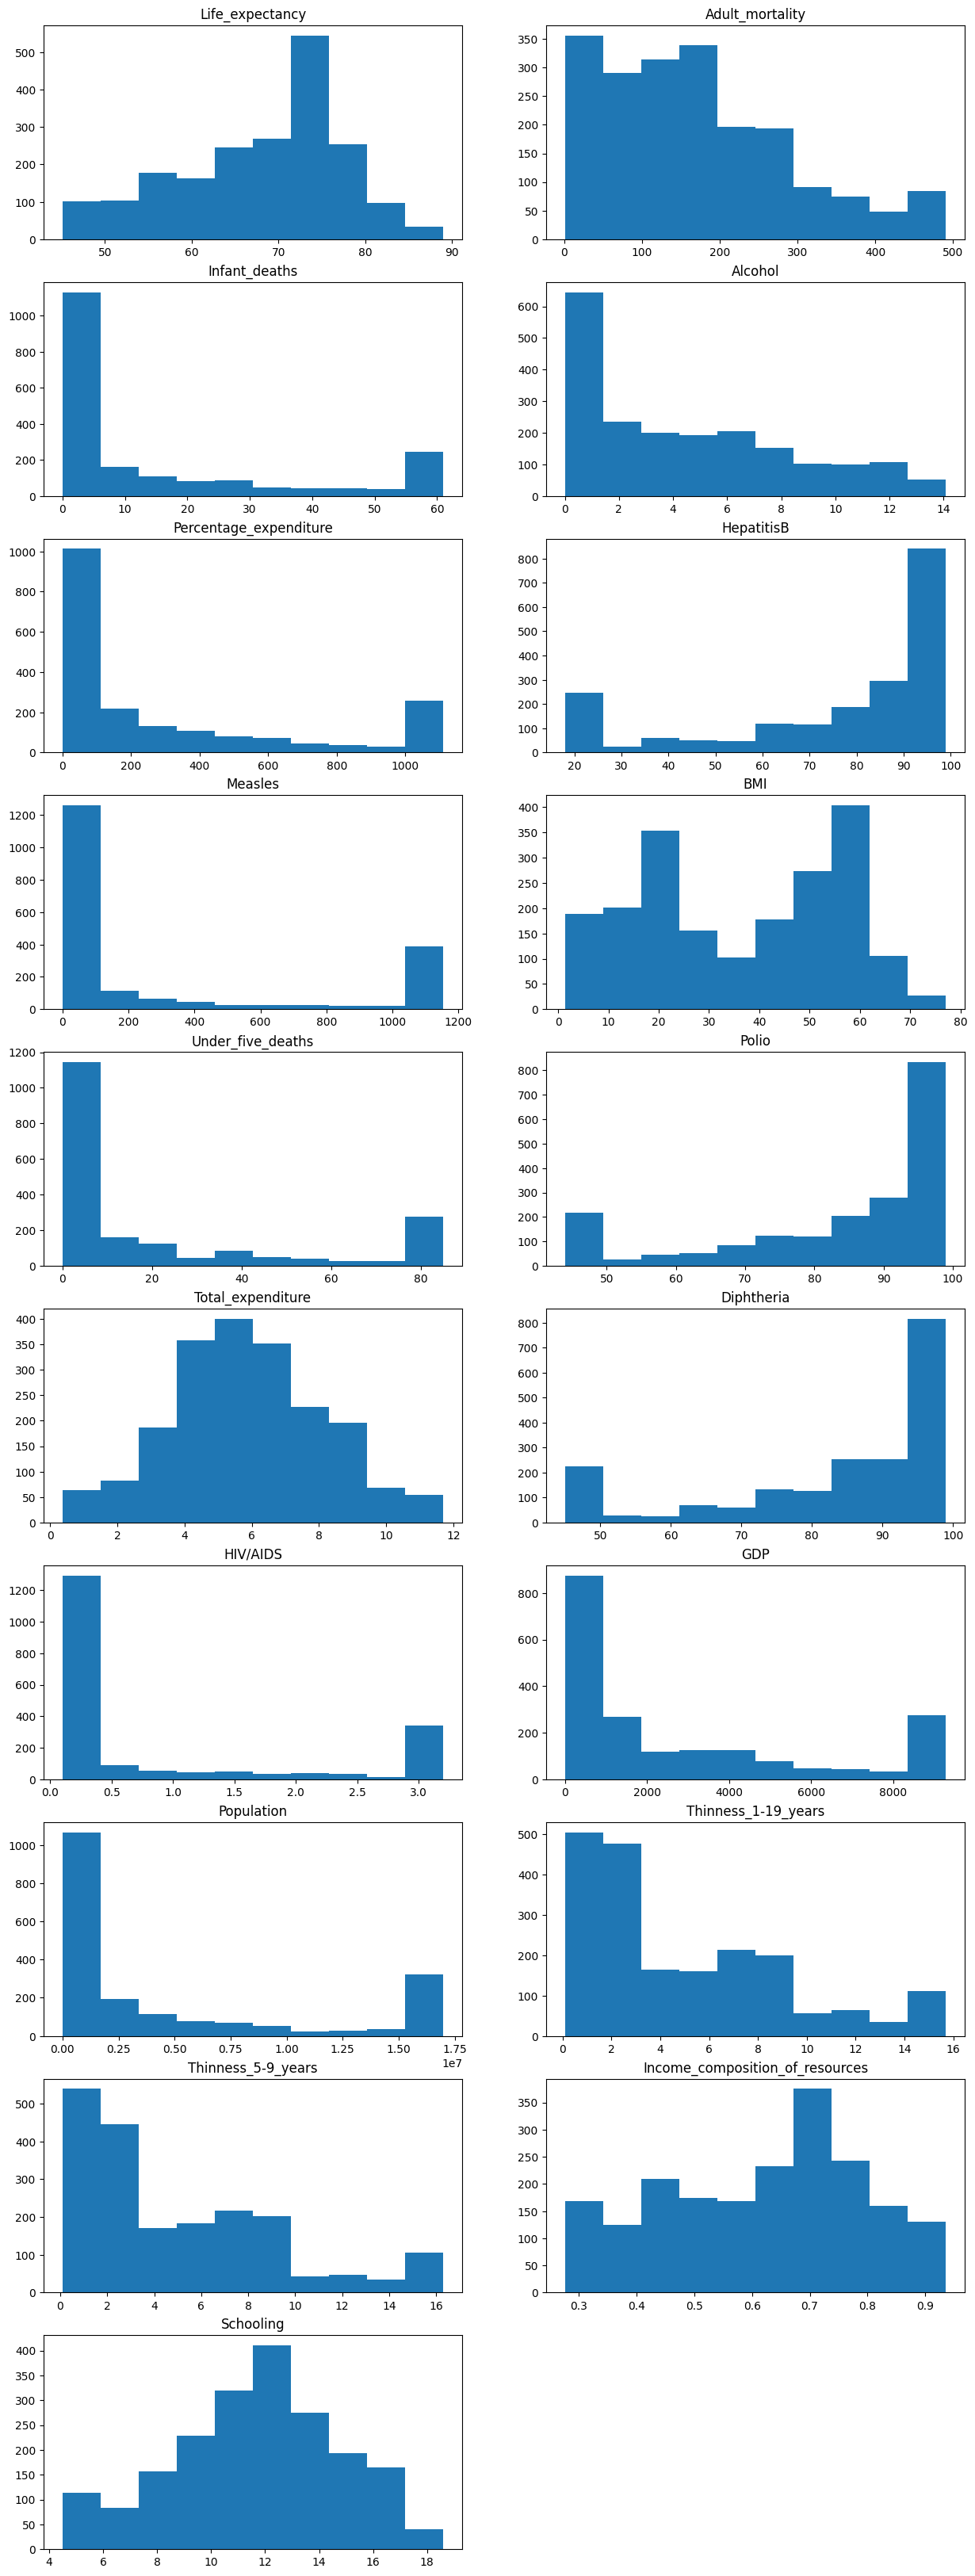

In [21]:

plt.figure(figsize=(15,75))

for i in range(len(columns)):
    plt.subplot(18,2,i+1)
    plt.hist(df[columns[i]])
    plt.title(columns[i])

plt.show()

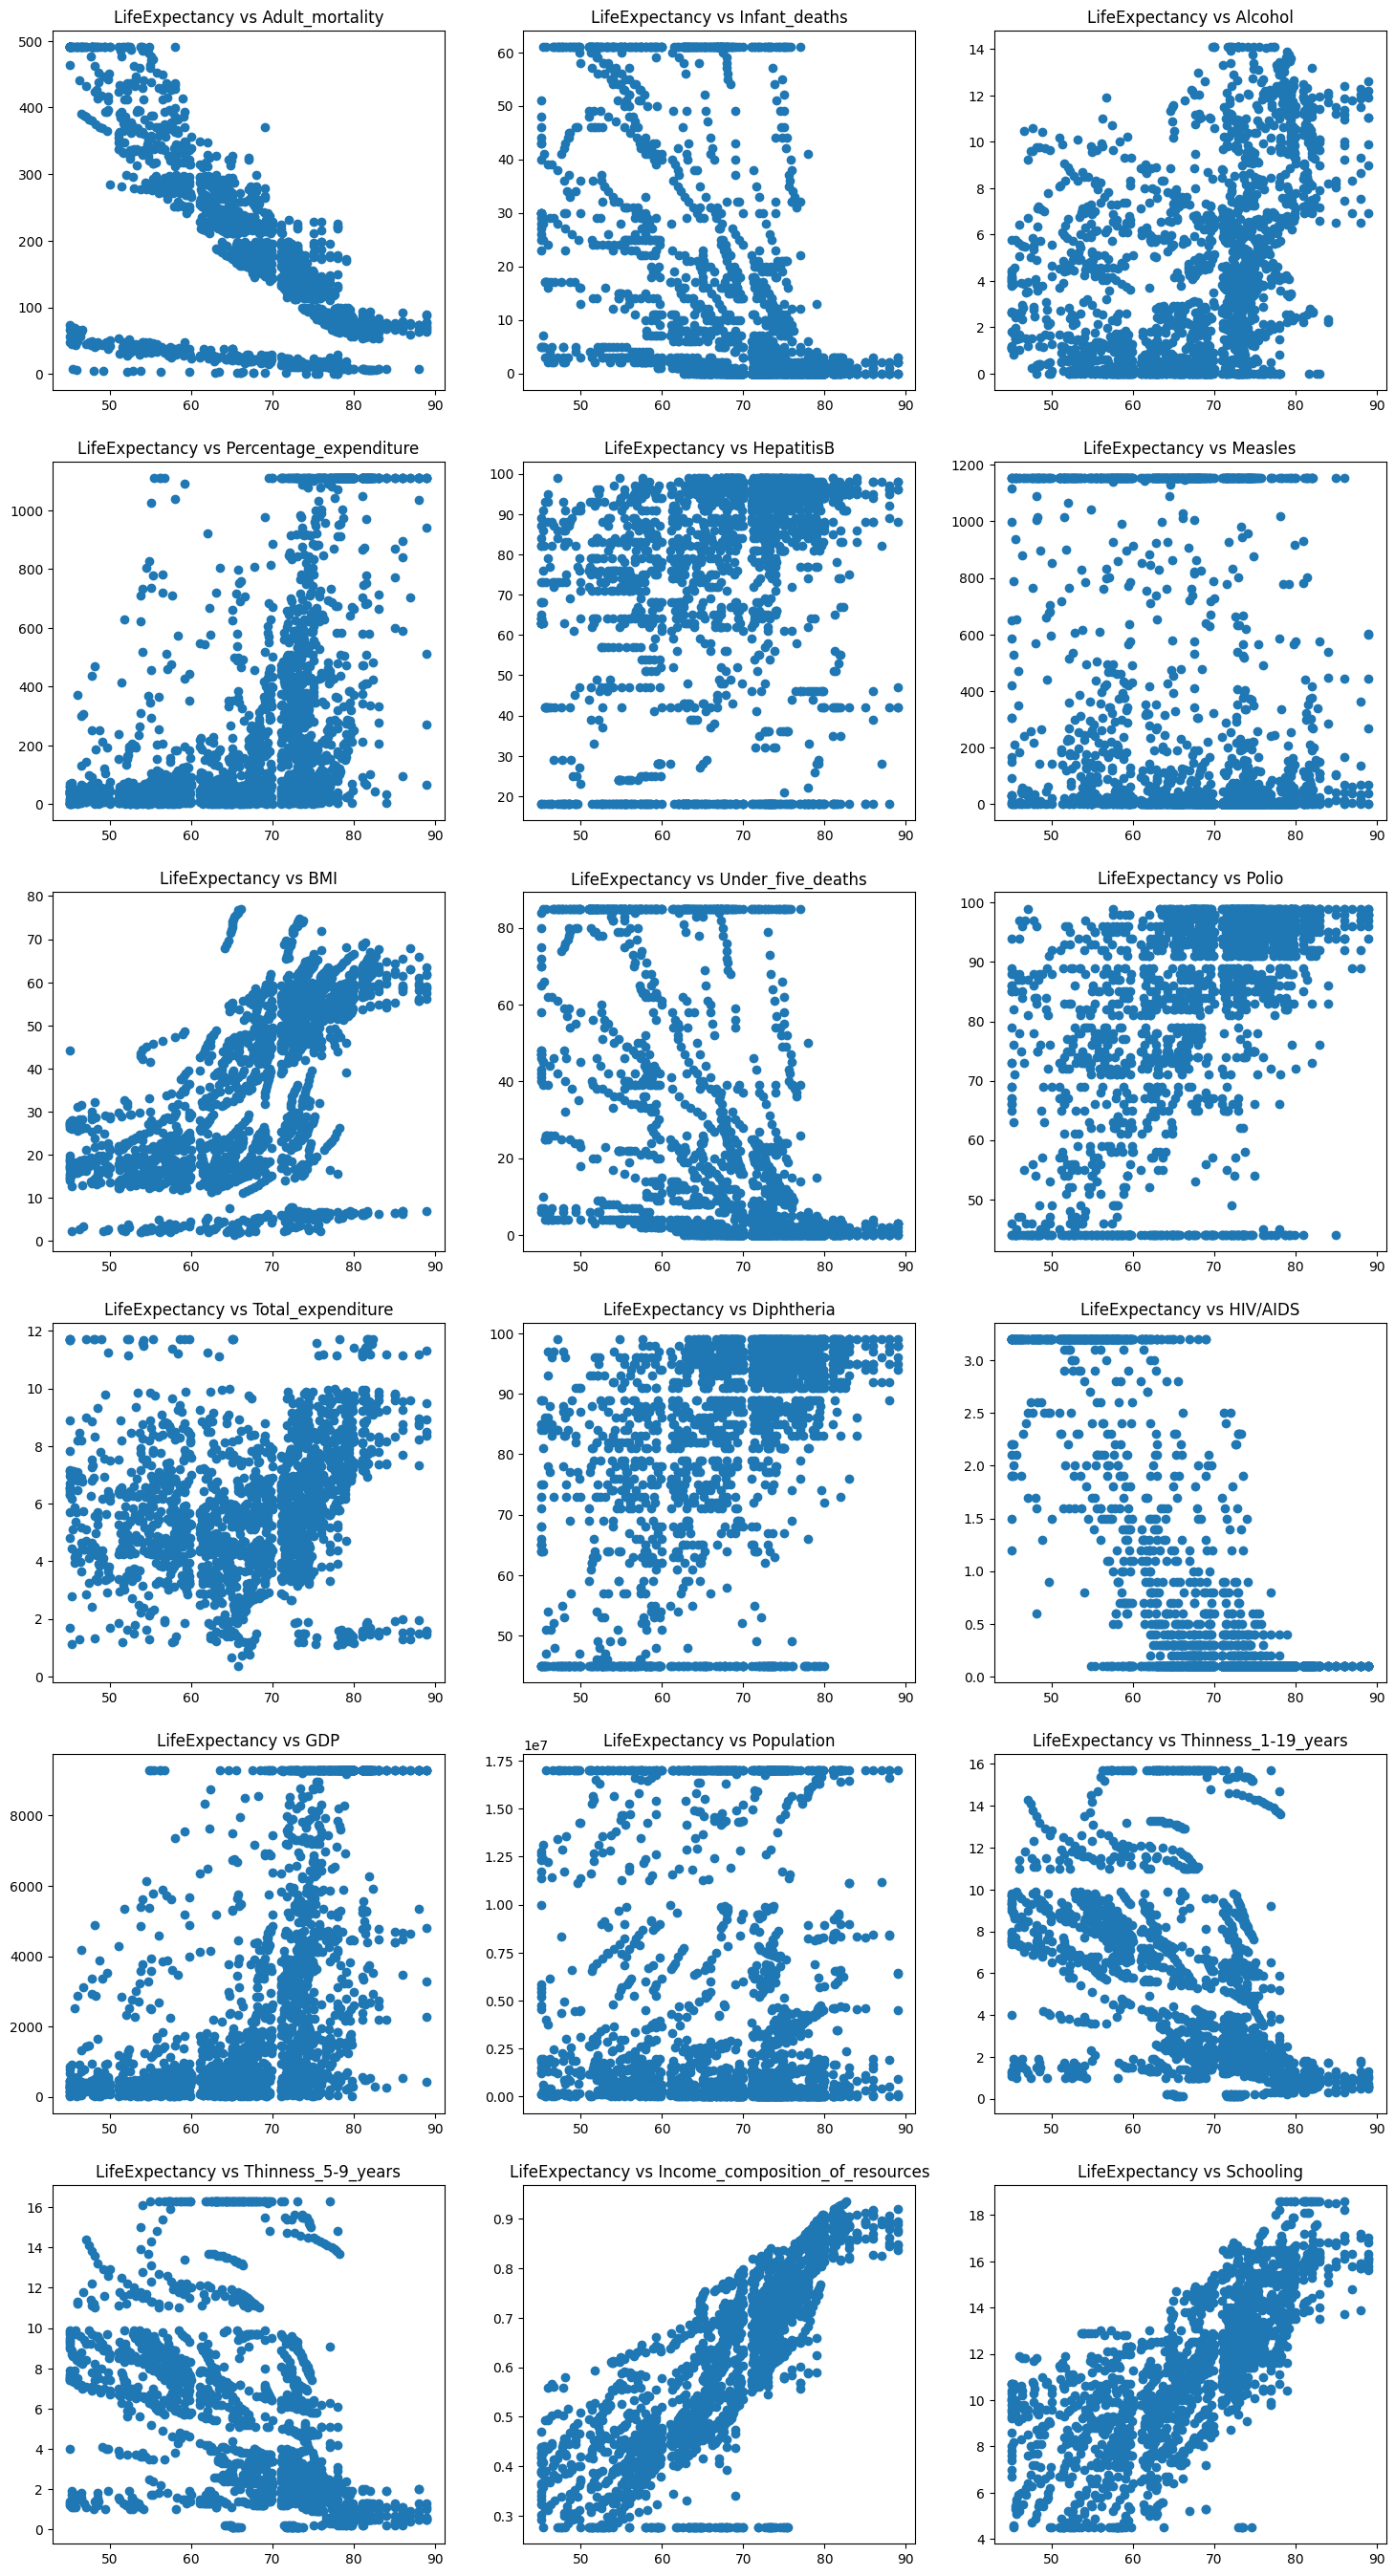

In [22]:
plt.figure(figsize=(18,40))

for i, col in enumerate(columns):
    if col != 'Life_expectancy':
        plt.subplot(7,3,i)
        plt.scatter(df["Life_expectancy"], df[col])
        plt.title(f"LifeExpectancy vs {col}")

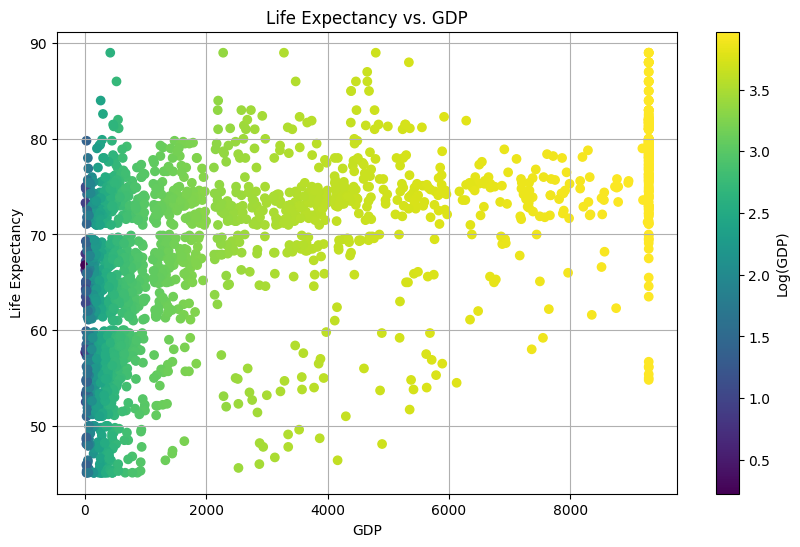

In [23]:
# Scatter plot of life expectancy versus GDP (Gross Domestic Product per capita (in USD))
plt.figure(figsize=(10, 6))
plt.scatter(df['GDP'], df['Life_expectancy'], c=np.log10(df['GDP']), cmap='viridis')
plt.title('Life Expectancy vs. GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.colorbar(label='Log(GDP)')
plt.grid(True) 
plt.show()


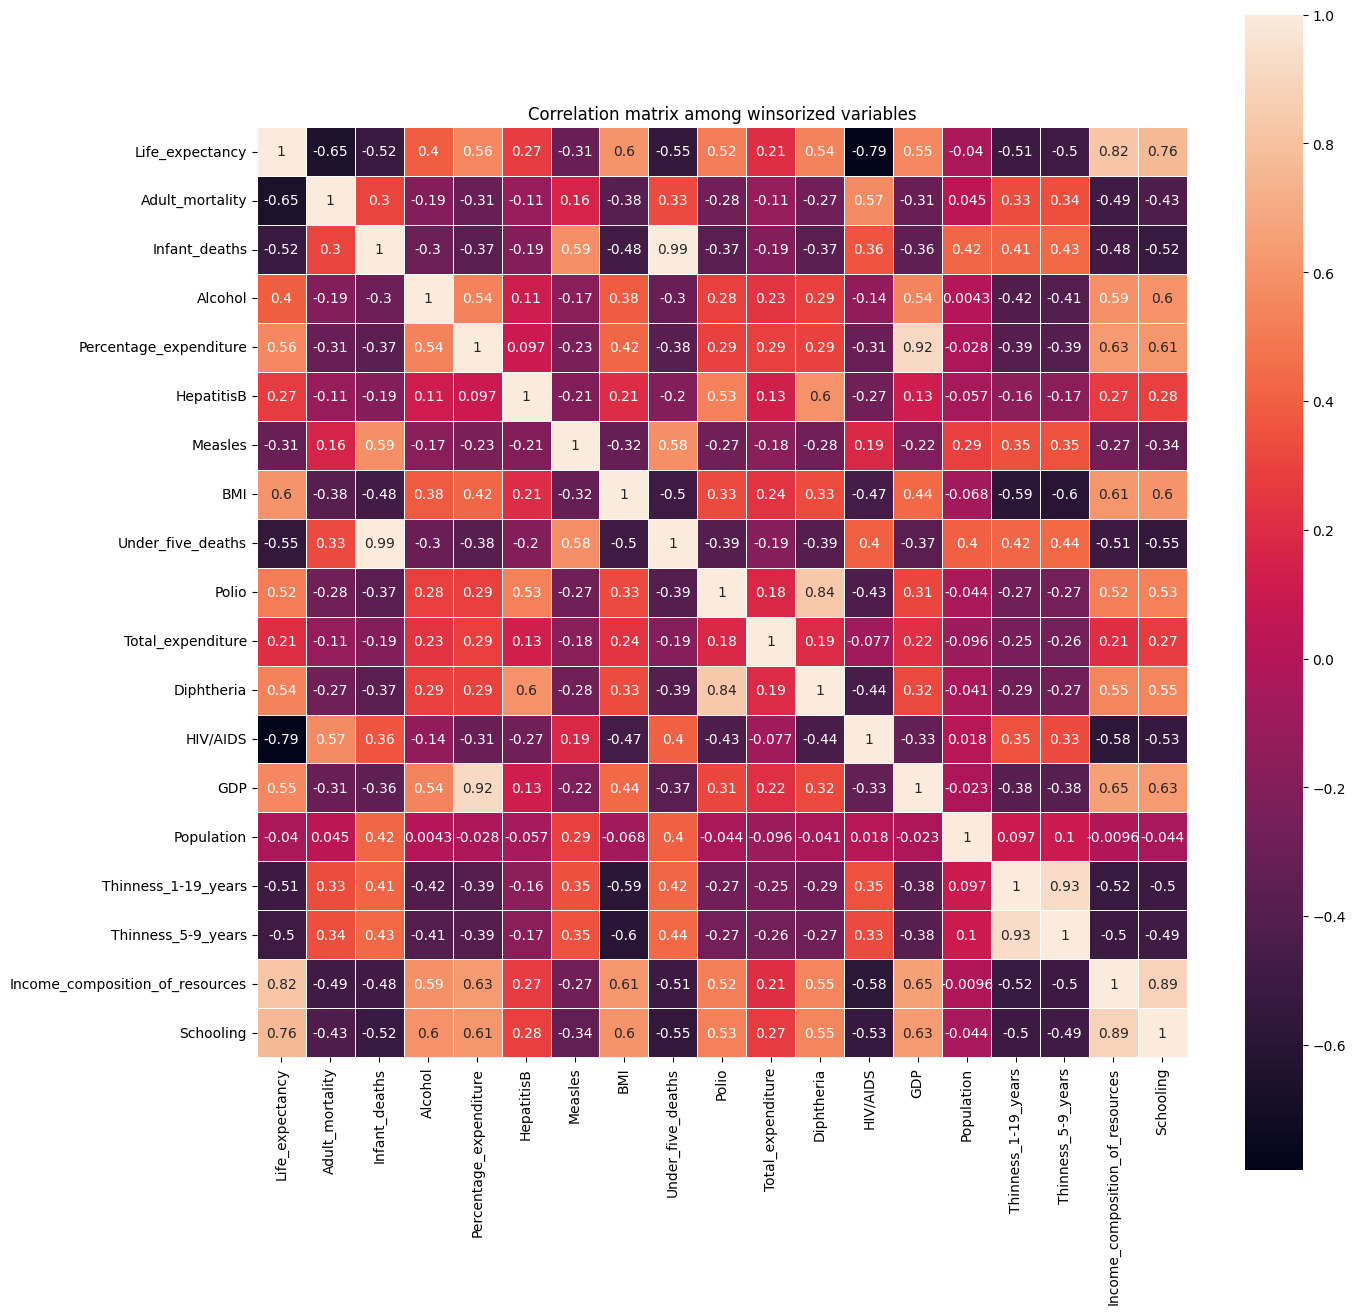

In [24]:
# Using heatmap to observe correlations.
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(df.drop('Year', axis= 1).corr(), square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()

In [25]:
df.drop('Year', axis= 1).corr()

Life_expectancy  Adult_mortality  \
Life_expectancy                         1.000000        -0.654255   
Adult_mortality                        -0.654255         1.000000   
Infant_deaths                          -0.516494         0.303275   
Alcohol                                 0.396073        -0.191173   
Percentage_expenditure                  0.557117        -0.313519   
HepatitisB                              0.268086        -0.113036   
Measles                                -0.313013         0.162011   
BMI                                     0.601434        -0.384986   
Under_five_deaths                      -0.552035         0.325745   
Polio                                   0.516167        -0.275361   
Total_expenditure                       0.208400        -0.114441   
Diphtheria                              0.535687        -0.274879   
HIV/AIDS                               -0.793696         0.570475   
GDP                                     0.551722        -0.307826   
Population                             -0.040138         0.045473   
Thinness_1-19_years                    -0.507870         0.329845   
Thinness_5-9_years                     -0.498791         0.335899   
Income_composition_of_resources         0.823222        -0.488595   
Schooling                               0.762333        -0.429127   

                                 Infant_deaths   Alcohol  \
Life_expectancy                      -0.516494  0.396073   
Adult_mortality                       0.303275 -0.191173   
Infant_deaths                         1.000000 -0.301196   
Alcohol                              -0.301196  1.000000   
Percentage_expenditure               -0.367645  0.535143   
HepatitisB                           -0.192581  0.113096   
Measles                               0.585217 -0.172897   
BMI                                  -0.475304  0.380291   
Under_five_deaths                     0.993583 -0.304476   
Polio                                -0.373281  0.280870   
Total_expenditure                    -0.192206  0.232997   
Diphtheria                           -0.369402  0.289133   
HIV/AIDS                              0.362366 -0.139499   
GDP                                  -0.355888  0.539202   
Population                            0.423702  0.004264   
Thinness_1-19_years                   0.412490 -0.417504   
Thinness_5-9_years                    0.432688 -0.406472   
Income_composition_of_resources      -0.478552  0.590256   
Schooling                            -0.521371  0.599497   

                                 Percentage_expenditure  HepatitisB   Measles  \
Life_expectancy                                0.557117    0.268086 -0.313013   
Adult_mortality                               -0.313519   -0.113036  0.162011   
Infant_deaths                                 -0.367645   -0.192581  0.585217   
Alcohol                                        0.535143    0.113096 -0.172897   
Percentage_expenditure                         1.000000    0.097402 -0.228420   
HepatitisB                                     0.097402    1.000000 -0.212068   
Measles                                       -0.228420   -0.212068  1.000000   
BMI                                            0.420946    0.208182 -0.320338   
Under_five_deaths                             -0.375608   -0.204625  0.581067   
Polio                                          0.287148    0.528167 -0.273715   
Total_expenditure                              0.287113    0.132563 -0.175305   
Diphtheria                                     0.294386    0.596233 -0.275367   
HIV/AIDS                                      -0.310117   -0.273668  0.186120   
GDP                                            0.915731    0.130146 -0.218882   
Population                                    -0.027779   -0.057207  0.290223   
Thinness_1-19_years                           -0.392719   -0.155582  0.346025   
Thinness_5-9_years                            -0.391349   -0.166730  0.352

In [71]:
life_expectancy_country_df = df.groupby('Country')[df.columns].mean()
life_expectancy_country_df.drop(columns=['Year'], inplace=True)
life_expectancy_country_df.reset_index(inplace=True)
life_expectancy_country_df

Country  Life_expectancy  Adult_mortality  Infant_deaths   Alcohol  \
0    Afghanistan        58.193750       269.062500      61.000000  0.014375   
1        Albania        75.156250        45.062500       0.687500  4.848750   
2        Algeria        73.486667       114.133333      20.266667  0.406667   
3         Angola        48.793333       328.133333      61.000000  5.740667   
4      Argentina        75.080000       105.333333      10.266667  7.966667   
..           ...              ...              ...            ...       ...   
128      Uruguay        76.013333       120.200000       0.600000  6.172667   
129   Uzbekistan        67.940000       184.866667      22.400000  1.608667   
130      Vanuatu        71.346667       146.200000       0.000000  0.806667   
131       Zambia        53.500000       347.200000      33.866667  2.239333   
132     Zimbabwe        49.533333       382.533333      26.866667  4.482000   

     Percentage_expenditure  HepatitisB      Measles        BMI  \
0                 34.960110   64.562500  1001.312500  15.518750   
1                193.259091   98.000000    53.375000  49.068750   
2                251.930923   78.933333   486.400000  48.026667   
3                108.906953   71.933333   924.733333  17.666667   
4                741.725968   79.000000     2.133333  54.460000   
..                      ...         ...          ...        ...   
128              491.166787   94.266667     0.000000  52.186667   
129               47.331680   90.933333   220.866667  34.146667   
130              301.147462   57.133333    19.666667  43.653333   
131               95.627101   78.600000   588.733333  17.053333   
132               21.721890   70.800000   393.133333  24.693333   

     Under_five_deaths      Polio  Total_expenditure  Diphtheria  HIV/AIDS  \
0            84.875000  55.687500           8.252500   57.687500  0.100000   
1             0.937500  98.125000           5.945625   98.062500  0.100000   
2            23.466667  91.533333           4.604000   91.666667  0.100000   
3            85.000000  58.333333           3.919333   57.733333  2.400000   
4            11.533333  93.400000           6.912667   92.266667  0.100000   
..                 ...        ...                ...         ...       ...   
128           0.800000  94.200000           8.750000   91.133333  0.100000   
129          26.266667  98.533333           5.638000   98.400000  0.213333   
130           0.000000  66.266667           3.928667   63.800000  0.100000   
131          53.200000  75.266667           5.824000   81.066667  3.200000   
132          41.400000  77.266667           6.158667   76.933333  3.200000   

             GDP    Population  Thinness_1-19_years  Thinness_5-9_years  \
0     340.015425  6.646191e+06            14.012500           13.687500   
1    2119.726679  6.969116e+05             1.618750            1.700000   
2    2762.192757  1.039061e+07             6.100000            5.986667   
3    1860.432998  9.026642e+06             6.053333            6.566667   
4    5650.422724  8.947016e+06             1.080000            0.953333   
..           ...           ...                  ...                 ...   
128  5124.907526  2.327786e+06             1.606667            1.553333   
129   551.993393  9.430079e+05             3.153333            3.180000   
130  2114.539610  1.295384e+05             1.573333            1.500000   
131   778.339987  6.666824e+06             6.920000            6.806667   
132   430.465951  7.504269e+06             7.106667            7.086667   

     Income_composition_of_resources  Schooling  
0                           0.415375   8.212500  
1                           0.709875  12.137500  
2                           0.691667  12.600000  
3                           0.453533   7.820000  
4                           0.792000  16.453333  
..                               ...        ...  
128                         0.763733  15.213333  
129              

In [72]:
round(df[['Status','Life_expectancy']].groupby(['Status']).mean(),2)


Life_expectancy
Status                     
Developed             78.83
Developing            66.19

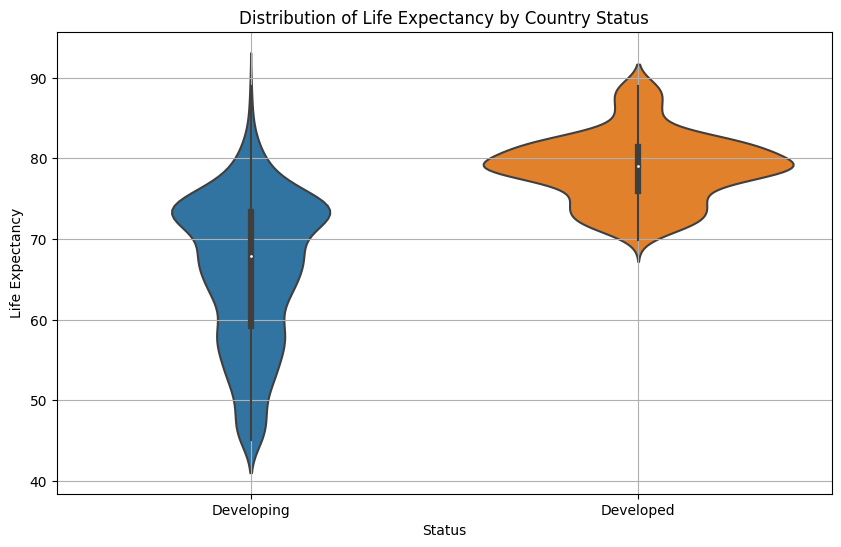

In [73]:
# Violin plot of life expectancy by country status
plt.figure(figsize=(10, 6))
sns.violinplot(x='Status', y='Life_expectancy', data=df)
plt.title('Distribution of Life Expectancy by Country Status')
plt.xlabel('Status')
plt.ylabel('Life Expectancy')
plt.grid(True) 
plt.show()

In [66]:
items = df.columns[4:]
items

Index(['Adult_mortality', 'Infant_deaths', 'Alcohol', 'Percentage_expenditure',
       'HepatitisB', 'Measles', 'BMI', 'Under_five_deaths', 'Polio',
       'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness_1-19_years', 'Thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

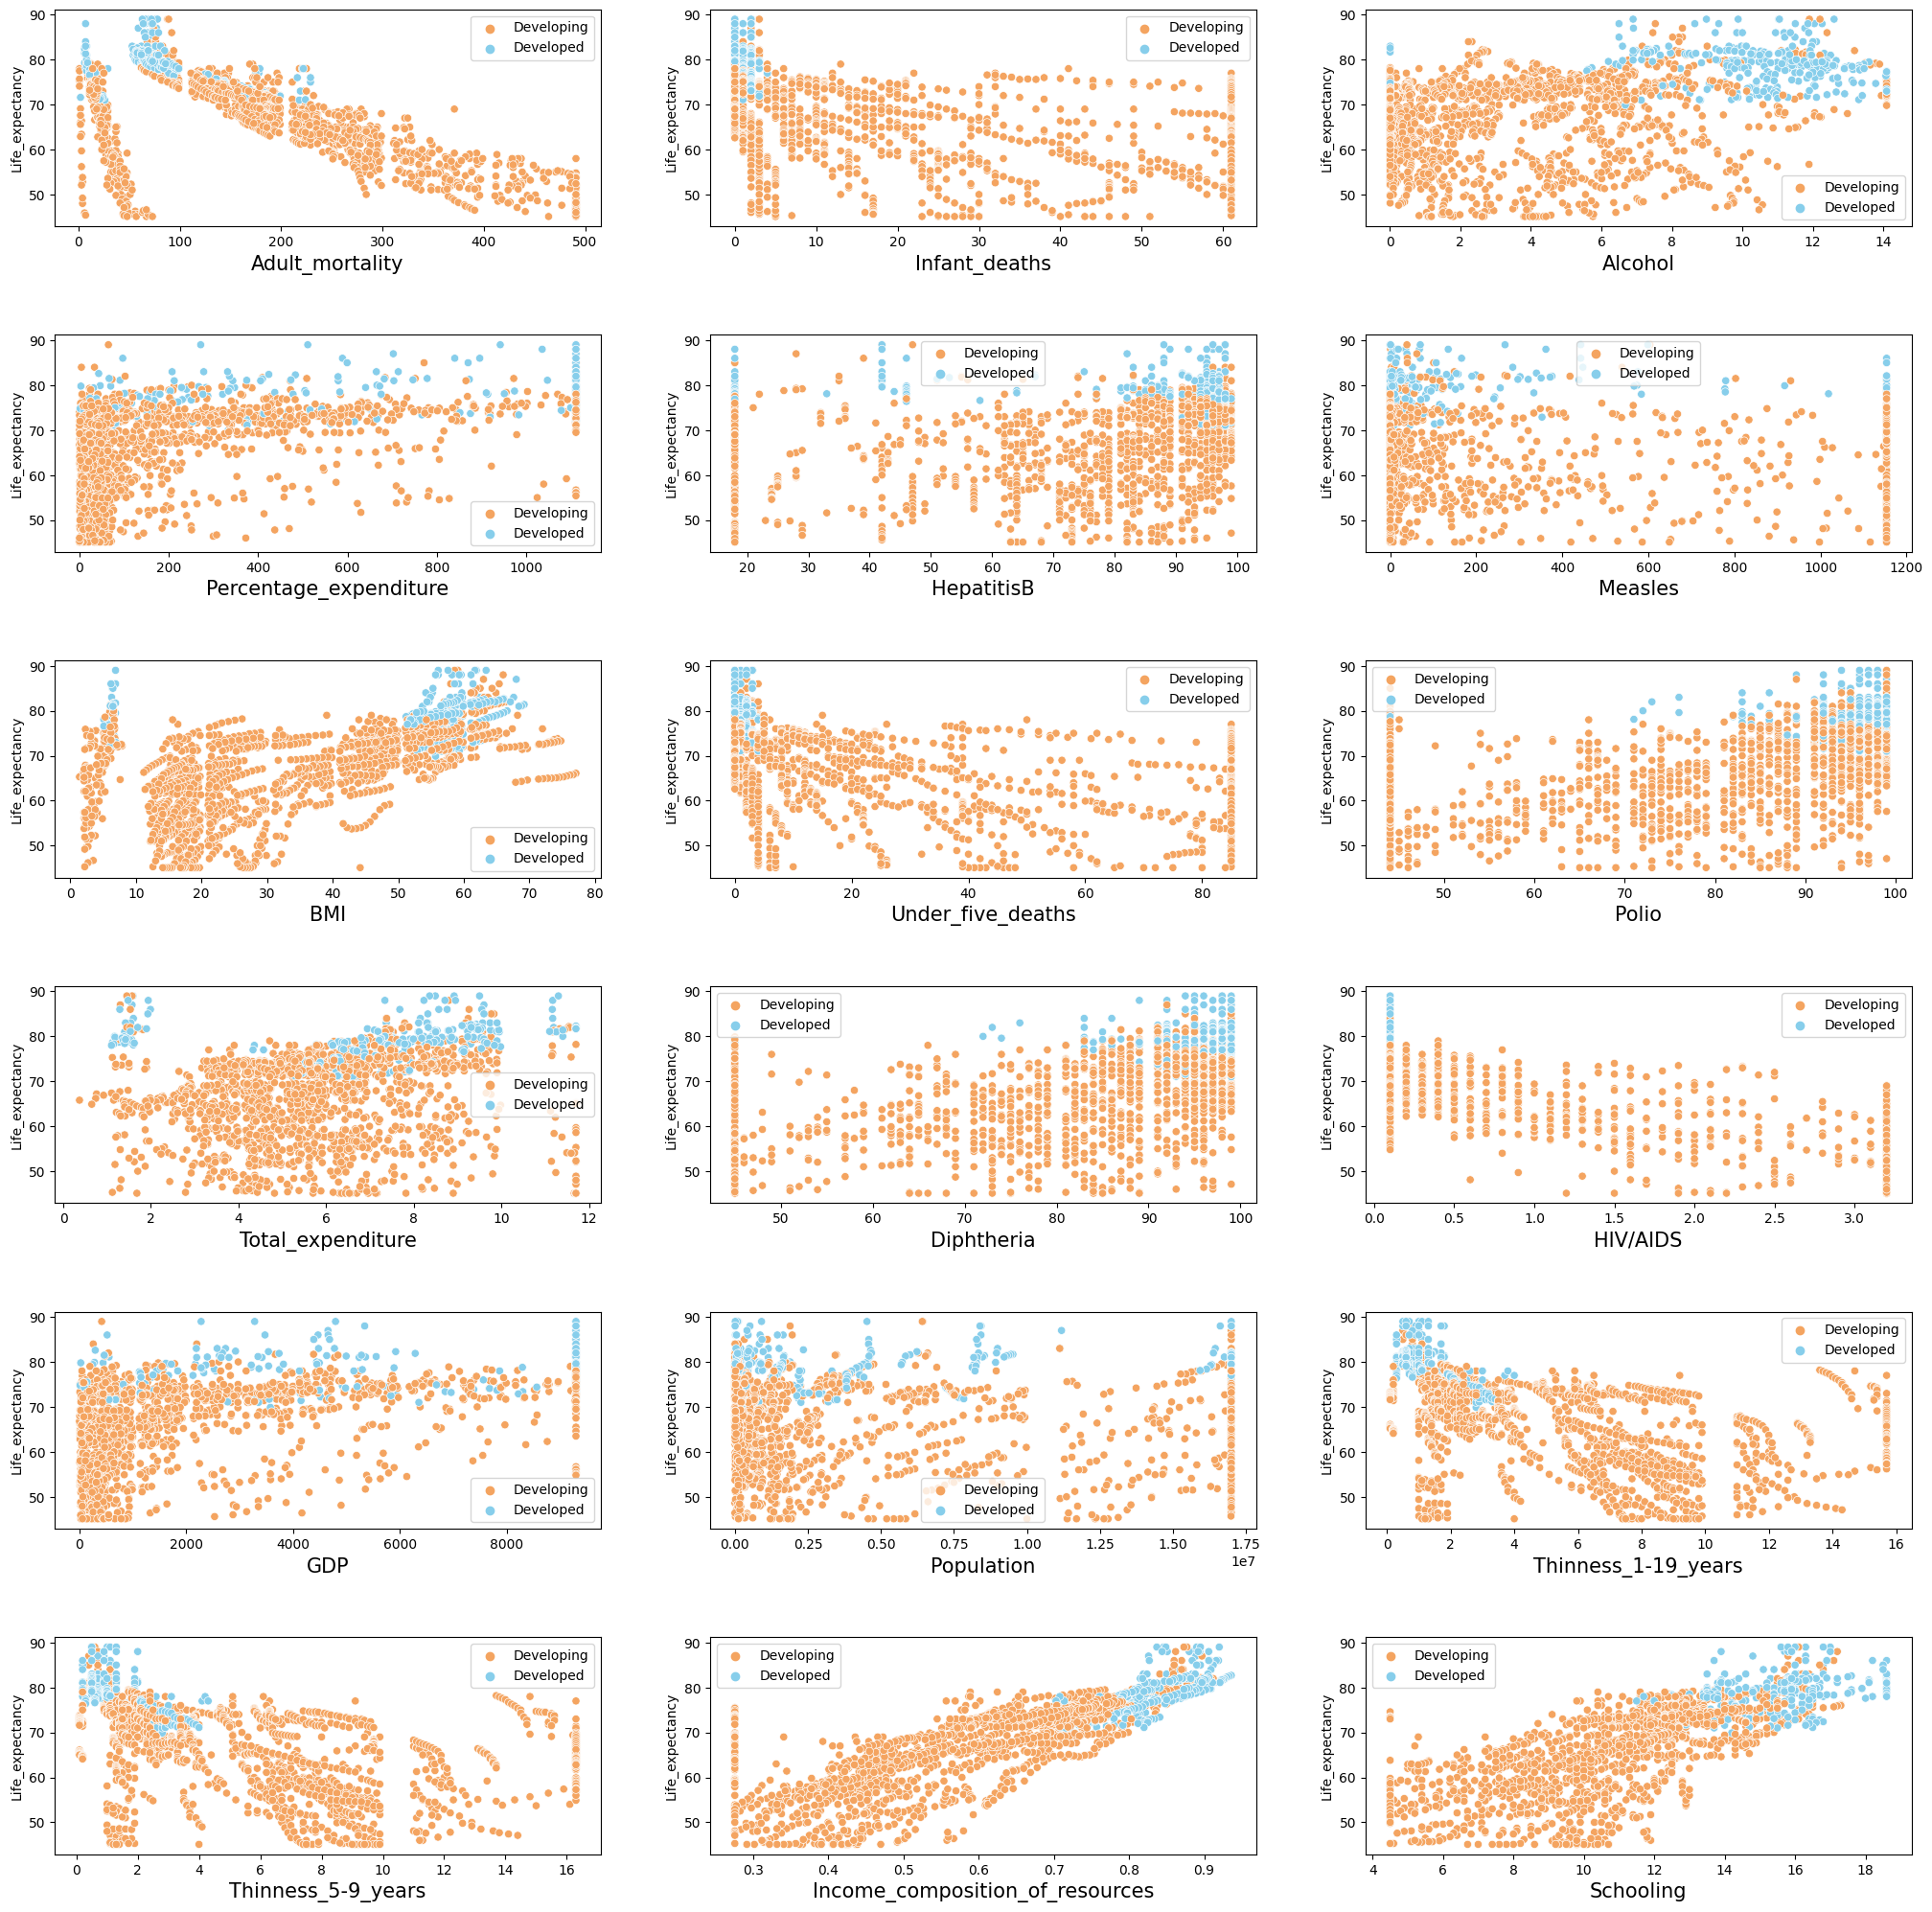

In [67]:
fig, axes = plt.subplots(6, 3, figsize = (25, 25))
plt.subplots_adjust(hspace = 0.5)

for position, item in enumerate(items):
    plot = sns.scatterplot(data = df, x = item, y = 'Life_expectancy', ax = axes.flat[position], hue = 'Status', palette = ['sandybrown', 'skyblue'])
    plot.set_xlabel(item, fontsize = 15)
    plot.legend(loc = 'best')


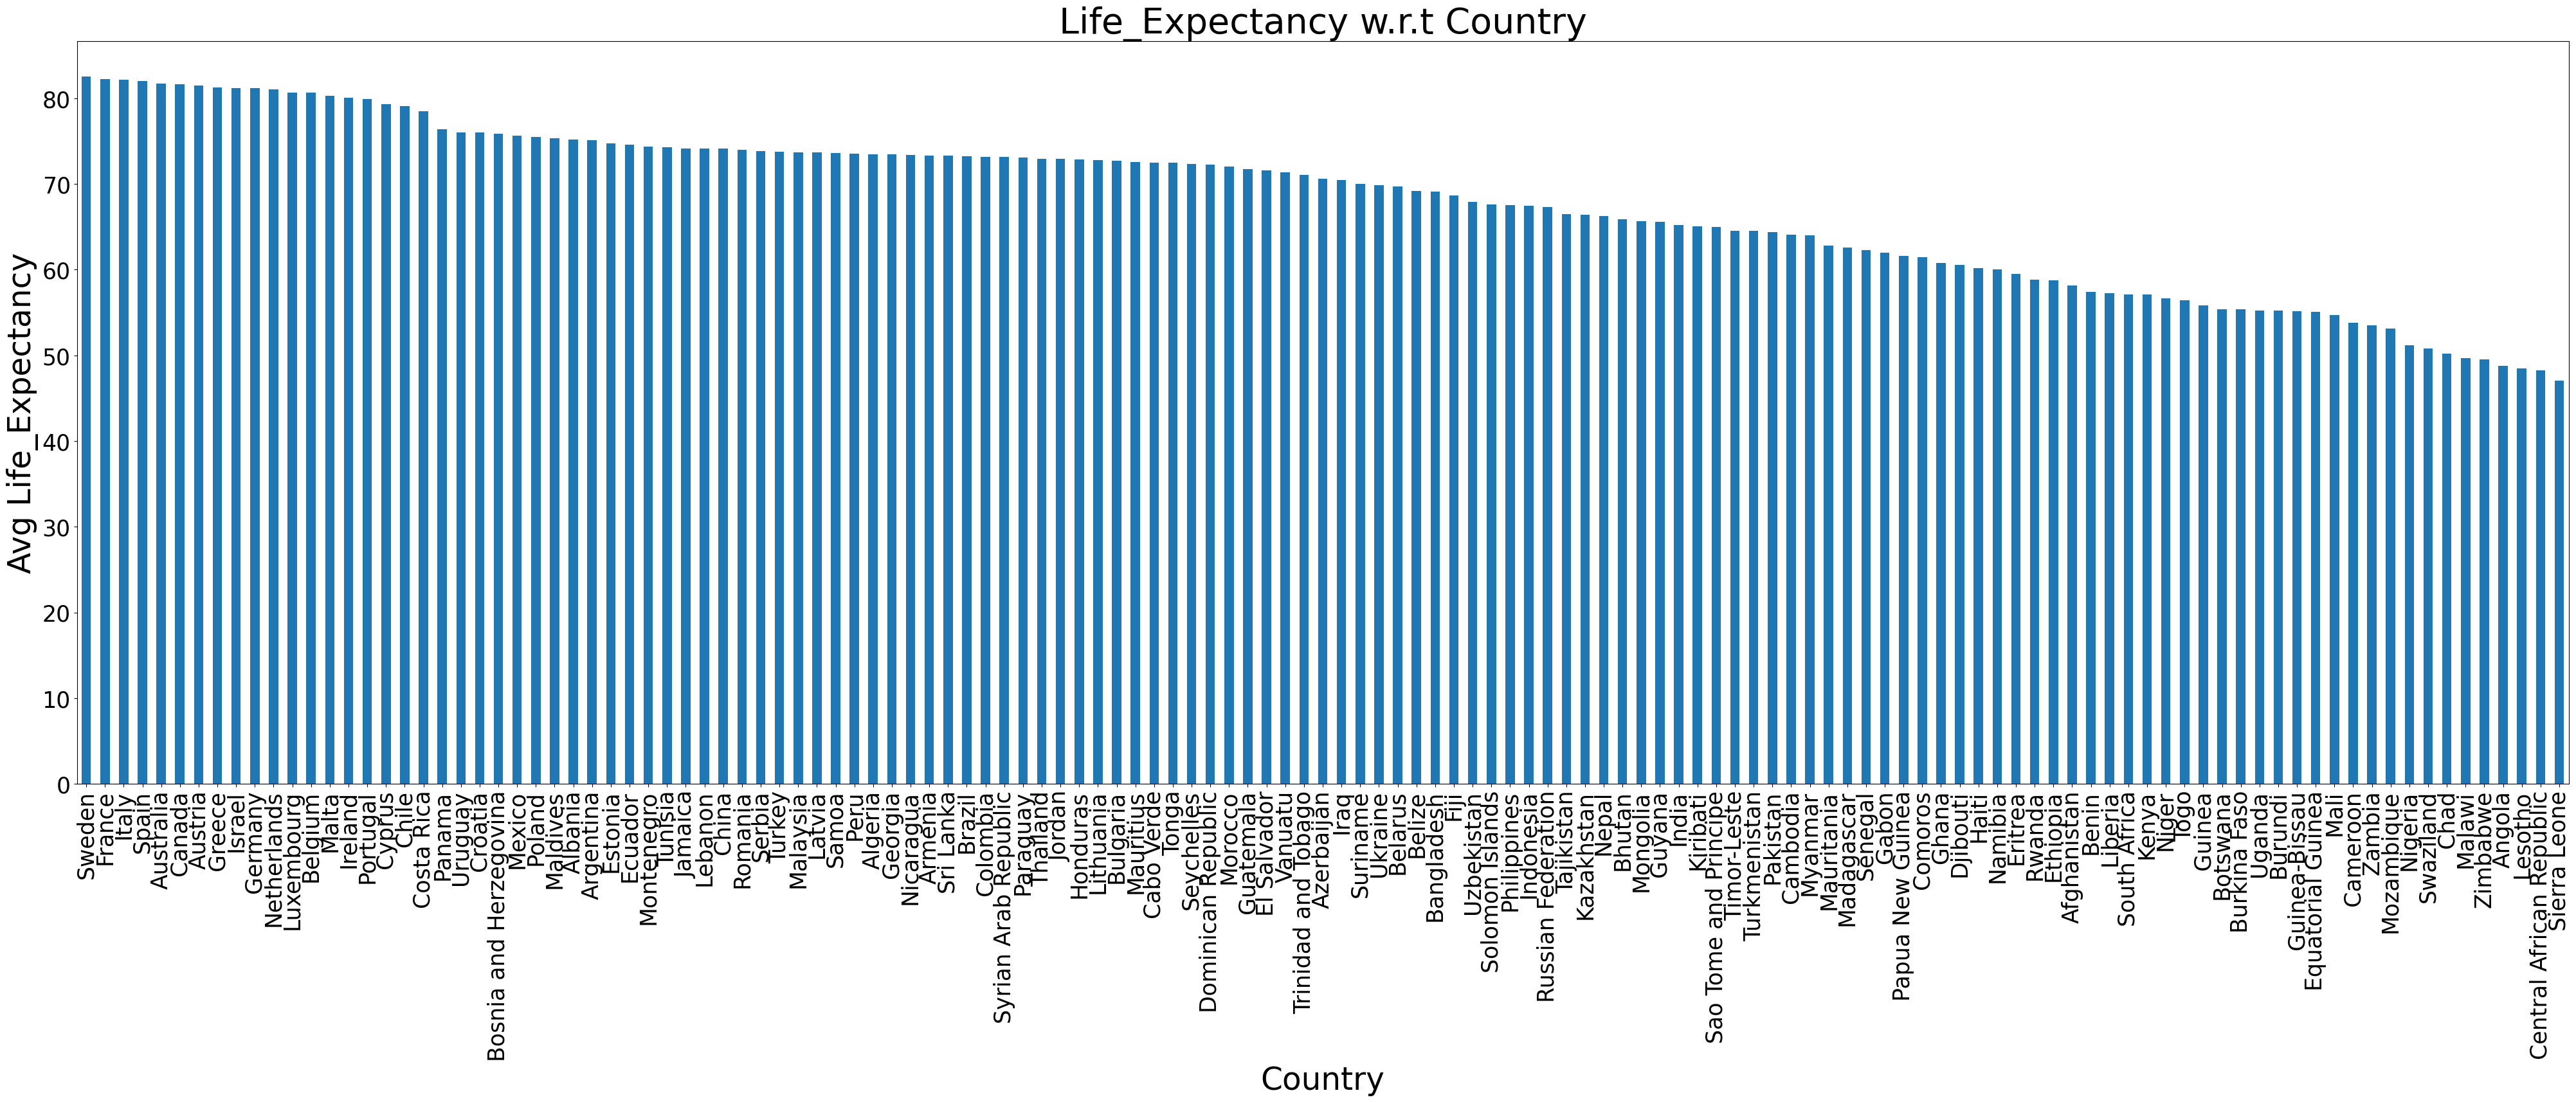

In [74]:
df_country_life_exp = life_expectancy_country_df.groupby('Country')['Life_expectancy'].mean()
df_country_life_exp.sort_values(ascending= False, inplace= True)
df_country_life_exp.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life_Expectancy w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()


In [75]:
country_status_df = df.groupby('Country')['Status'].min()
country_status_df = country_status_df.reset_index()
country_status_df

Country      Status
0    Afghanistan  Developing
1        Albania  Developing
2        Algeria  Developing
3         Angola  Developing
4      Argentina  Developing
..           ...         ...
128      Uruguay  Developing
129   Uzbekistan  Developing
130      Vanuatu  Developing
131       Zambia  Developing
132     Zimbabwe  Developing

[133 rows x 2 columns]

In [76]:
life_expectancy_country_df = life_expectancy_country_df.merge(country_status_df, on='Country')
# temp = life_expectancy_country_df['Country']

# numerical_columns = life_expectancy_country_df.select_dtypes(include=['float64', 'int64'])
# column_names = numerical_columns.columns



# # Prepare your dataset
# # dataset = ... (Your dataset in a 2-dimensional array or DataFrame)

# # Create an instance of the scaler
# scaler = MinMaxScaler(feature_range=(0, 1))

# # Fit the scaler to your dataset
# scaler.fit(numerical_columns)

# # Transform your dataset
# scaled_dataset = scaler.transform(numerical_columns)
# scaled_dataset = pd.DataFrame(data=scaled_dataset, columns=column_names)
# scaled_dataset['Country'] = temp
# first_column = scaled_dataset['Country']
# scaled_dataset = pd.concat([first_column, scaled_dataset.drop('Country', axis=1)], axis=1)
# scaled_dataset


In [34]:
top_countries_df = life_expectancy_country_df.sort_values(by=['Life_expectancy'], ascending=False).head(10)
top_countries_df

Country  Life_expectancy  Adult_mortality  Infant_deaths    Alcohol  \
115     Sweden        82.526667        59.600000       0.000000   6.926667   
43      France        82.206667        72.800000       3.000000  12.404667   
60       Italy        82.153333        54.066667       2.066667   8.266667   
111      Spain        82.020000        64.133333       1.666667  10.024000   
6    Australia        81.746667        63.466667       1.000000  10.155333   
24      Canada        81.653333        64.666667       2.000000   8.053333   
7      Austria        81.480000        65.800000       0.000000  12.236000   
48      Greece        81.233333        73.733333       0.200000   8.803333   
59      Israel        81.220000        59.600000       1.000000   2.497333   
46     Germany        81.186667        71.466667       2.533333  11.628667   

     Percentage_expenditure  HepatitisB     Measles        BMI  \
115             1026.245997   46.066667   18.733333  56.033333   
43               919.729350   48.933333  545.466667  51.280000   
60               811.286862   95.666667  557.533333  55.653333   
111              812.724479   92.200000  292.333333  58.140000   
6                903.052529   93.466667  105.933333  55.146667   
24               995.556969   27.733333  125.133333  55.120000   
7                933.282719   80.266667   61.800000  47.666667   
48               824.924257   89.066667   26.466667  58.160000   
59               645.269410   97.533333  142.866667  54.326667   
46               971.185459   77.933333  726.333333  51.306667   

     Under_five_deaths  ...  Total_expenditure  Diphtheria  HIV/AIDS  \
115           0.000000  ...           9.892667   98.333333       0.1   
43            3.466667  ...           6.556000   98.066667       0.1   
60            2.333333  ...           8.777333   94.866667       0.1   
111           1.933333  ...           8.536667   96.733333       0.1   
6             1.400000  ...           8.836667   88.866667       0.1   
24            2.000000  ...           7.052000   91.066667       0.1   
7             0.000000  ...           4.715333   86.333333       0.1   
48            0.466667  ...           9.038667   96.466667       0.1   
59            1.000000  ...           7.478667   91.000000       0.1   
46            3.266667  ...           4.073333   91.933333       0.1   

             GDP    Population  Thinness_1-19_years  Thinness_5-9_years  \
115  7960.194763  5.229247e+06             1.340000            1.300000   
43   7487.530865  1.030184e+07             0.620000            0.600000   
60   6702.103003  9.983894e+06             0.506667            0.520000   
111  6548.423325  1.066071e+07             0.600000            0.500000   
6    7149.672821  2.516261e+06             0.673333            0.626667   
24   7812.687267  6.182966e+06             0.500000            0.433333   
7    7713.758391  6.330994e+06             1.720000            1.926667   
48   7354.060116  1.641363e+06             0.813333            0.733333   
59   6315.758363  2.916167e+04             1.140000            1.100000   
46   7206.620423  9.727082e+06             1.120000            1.106667   

     Income_composition_of_resources  Schooling      Status  
115                         0.892067  15.866667   Developed  
43                          0.869000  15.873333  Developing  
60                          0.856533  15.906667   Developed  
111                         0.848467  16.266667   Developed  
6                           0.916867  18.600000   Developed  
24                          0.890400  15.846667  Developing  
7                           0.860400  15.353333   Developed  
48                          0.840800  15.853333  Developing  
59                          0.871533  15.693333  Developing  
46                          0.892533  16.566667   Developed  

[10 rows x 21 columns]

In [35]:
top_countries_df = life_expectancy_country_df.sort_values(by=['Life_expectancy'], ascending=False).head(10)



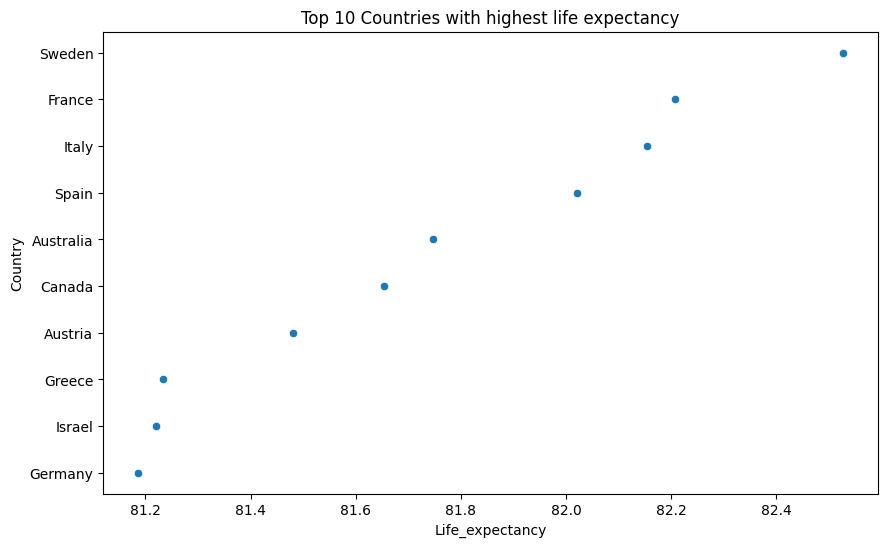

In [36]:
plt.figure(figsize=(10,6))
# plt.xticks(rotation=75)
plt.title('Top 10 Countries with highest life expectancy')
sns.scatterplot(x=top_countries_df['Life_expectancy'], y=top_countries_df['Country']);

[<BarContainer object of 10 artists>] ['Total Expenditure'] [<BarContainer object of 10 artists>, <BarContainer object of 10 artists>] ['Life Expectancy', 'Total Expenditure']


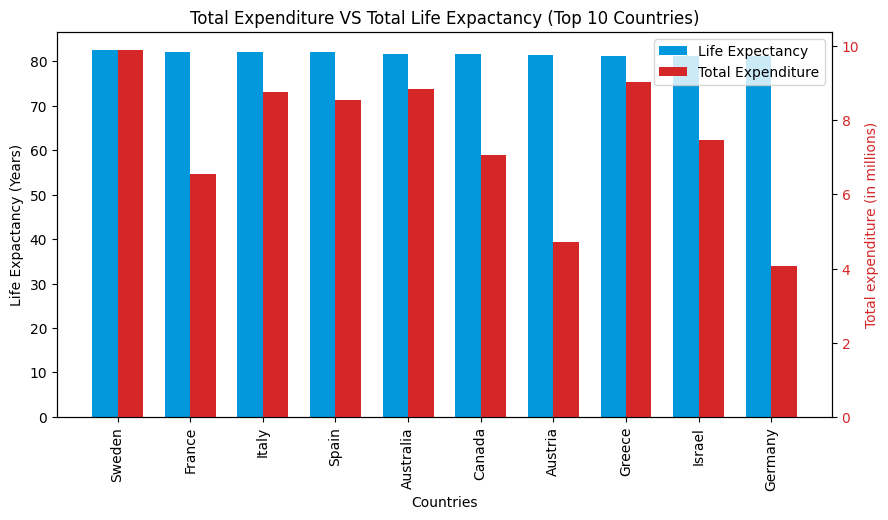

In [38]:
# Group the data by country and calculate average life expectancy
tempData = life_expectancy_country_df.groupby(['Country'])['Life_expectancy', 'Total_expenditure'].mean()
tempData = tempData.sort_values(by='Life_expectancy', ascending = False)
top_10 = tempData.head(10)
top_10 = top_10.reset_index()
region = top_10.Country.unique().tolist()

fig, ax1 = plt.subplots(figsize=(10, 5))

x_index = np.arange(len(region))
width = 0.35
ax1.bar(x_index-width/2, top_10['Life_expectancy'], width = width, color='#0398dc', label = 'Life Expectancy')
plt.xticks(x_index, labels=region)
plt.xticks(rotation = 90)
ax1.set_xlabel("Countries")
ax1.set_ylabel("Life Expactancy (Years)")

ax2 = ax1.twinx()
ax2.bar(x_index+width/2, top_10['Total_expenditure'], width = width, color='tab:red', label = 'Total Expenditure')
ax2.set_ylabel('Total expenditure (in millions)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Total Expenditure VS Total Life Expactancy (Top 10 Countries)")
# Combine the handles and labels from both axes for the legend
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles.extend(handles2)
labels.extend(labels2)
print(handles2, labels2, handles, labels)
# Create the legend
plt.legend(handles, labels, loc='upper right')
plt.show()



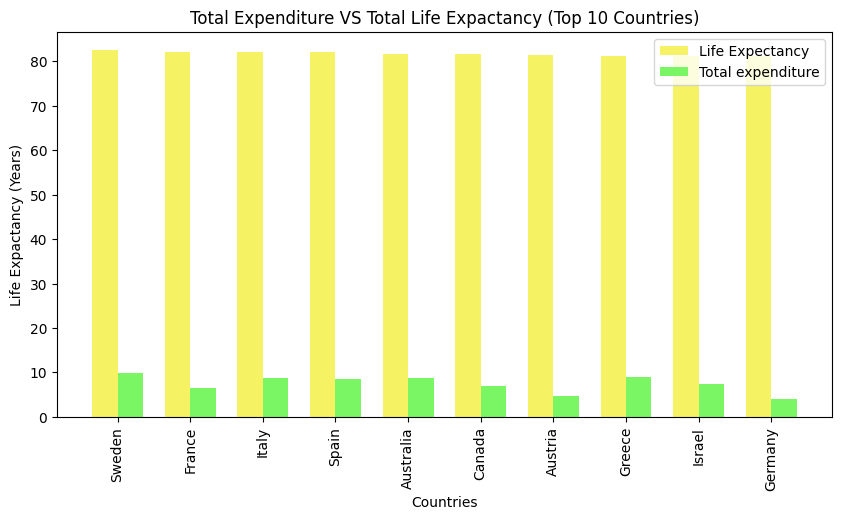

In [39]:
# Group the data by country and calculate average life expectancy
tempData = life_expectancy_country_df.groupby(['Country'])['Life_expectancy', 'Total_expenditure'].mean()
tempData = tempData.sort_values(by='Life_expectancy', ascending = False)
top_10 = tempData.head(10)
top_10 = top_10.reset_index()
region = top_10.Country.unique().tolist()

fig = plt.figure(figsize=(10,5))

x_index = np.arange(len(region))
width = 0.35
plt.bar(x_index-width/2, top_10['Life_expectancy'], width = width, color='#f5f364')
plt.bar(x_index+width/2, top_10['Total_expenditure'], width = width, color='#7af564')
plt.xticks(x_index, labels=region)
plt.xticks(rotation = 90)
plt.xlabel("Countries")
plt.ylabel("Life Expactancy (Years)")
plt.title("Total Expenditure VS Total Life Expactancy (Top 10 Countries)")
plt.legend(['Life Expectancy', 'Total expenditure'])
plt.show()

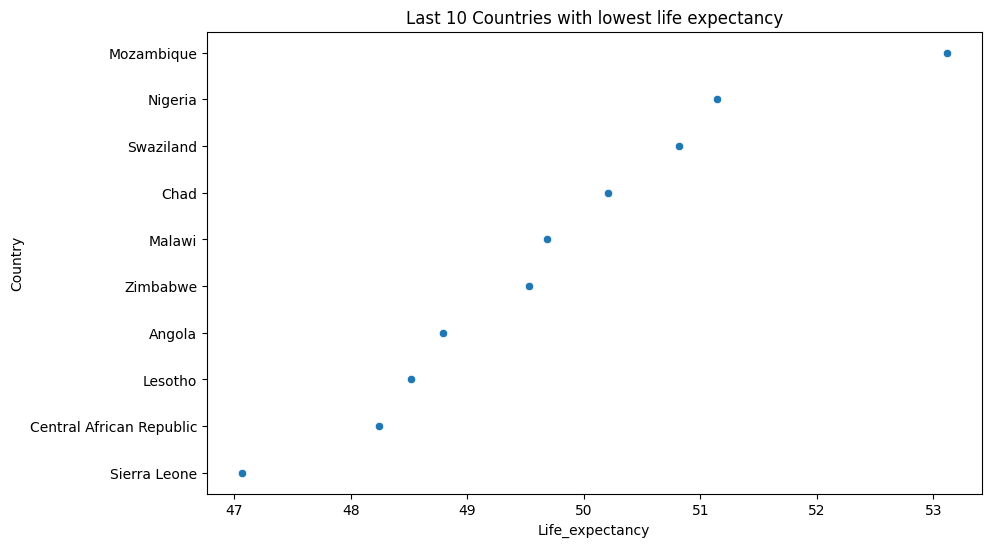

In [40]:
btm_10 = tempData.tail(10)
btm_10 = btm_10.reset_index()
region = btm_10.Country.unique().tolist()

plt.figure(figsize=(10,6))
# plt.xticks(rotation=75)
plt.title('Last 10 Countries with lowest life expectancy')
sns.scatterplot(x=btm_10['Life_expectancy'], y=btm_10['Country']);

[<BarContainer object of 10 artists>] ['Total Expenditure'] [<BarContainer object of 10 artists>, <BarContainer object of 10 artists>] ['Life Expectancy', 'Total Expenditure']


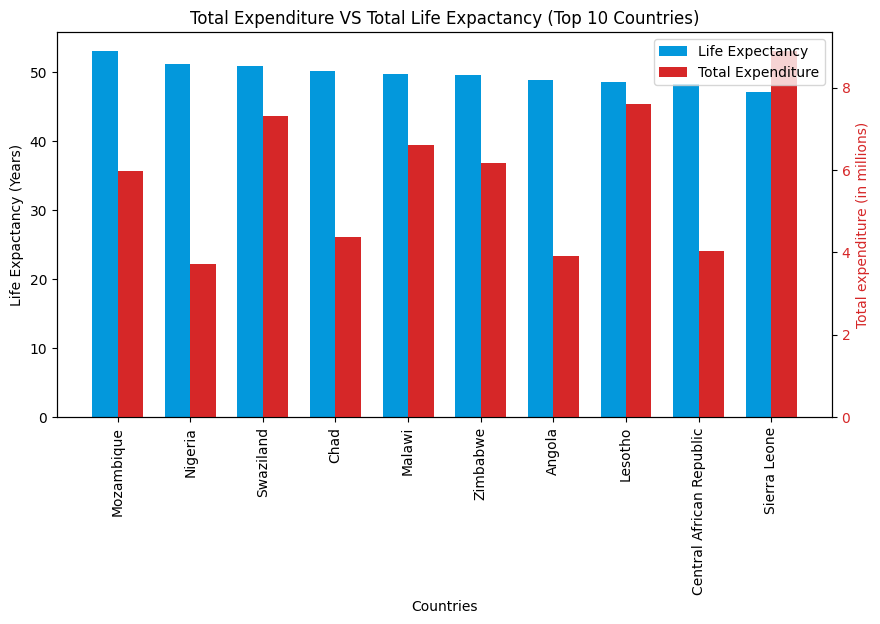

In [41]:

fig, ax1 = plt.subplots(figsize=(10, 5))

x_index = np.arange(len(region))
width = 0.35
ax1.bar(x_index-width/2, btm_10['Life_expectancy'], width = width, color='#0398dc', label = 'Life Expectancy')
plt.xticks(x_index, labels=region)
plt.xticks(rotation = 90)
ax1.set_xlabel("Countries")
ax1.set_ylabel("Life Expactancy (Years)")

ax2 = ax1.twinx()
ax2.bar(x_index+width/2, btm_10['Total_expenditure'], width = width, color='tab:red', label = 'Total Expenditure')
ax2.set_ylabel('Total expenditure (in millions)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Total Expenditure VS Total Life Expactancy (Top 10 Countries)")
# Combine the handles and labels from both axes for the legend
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles.extend(handles2)
labels.extend(labels2)
print(handles2, labels2, handles, labels)
# Create the legend
plt.legend(handles, labels, loc='upper right')
plt.show()


[<BarContainer object of 45 artists>] ['Total Expenditure'] [<BarContainer object of 45 artists>, <BarContainer object of 45 artists>] ['Life Expectancy', 'Total Expenditure']


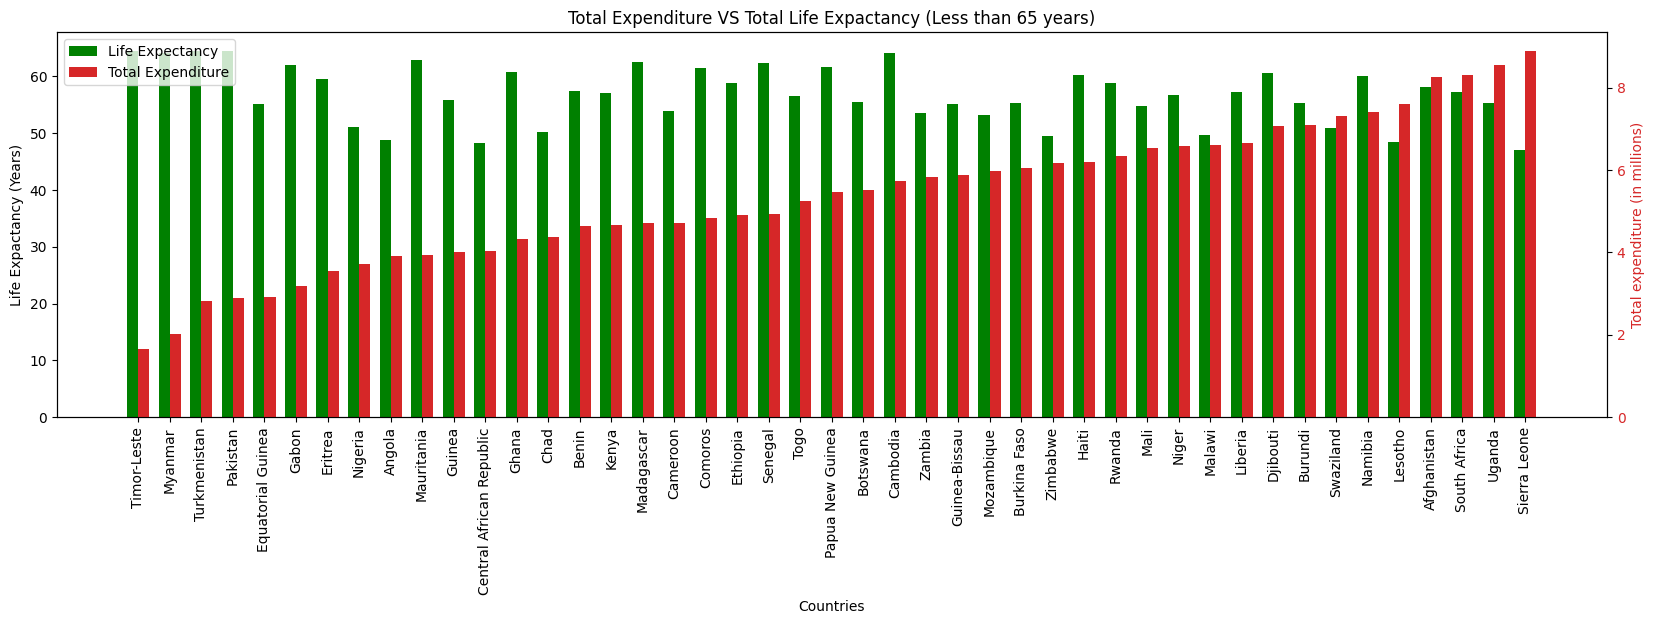

In [42]:
life_exp_lower_than_65 = life_expectancy_country_df[life_expectancy_country_df['Life_expectancy'] < 65 ]
life_exp_lower_than_65.sort_values(by='Total_expenditure', ascending= True, inplace= True)
life_exp_lower_than_65 = life_exp_lower_than_65.reset_index()
region = life_exp_lower_than_65.Country.unique().tolist()


fig, ax1 = plt.subplots(figsize=(20, 5))

x_index = np.arange(len(region))
width = 0.35
ax1.bar(x_index-width/2, life_exp_lower_than_65['Life_expectancy'], width = width, color='green', label = 'Life Expectancy')
plt.xticks(x_index, labels=region)
plt.xticks(rotation = 90)
ax1.set_xlabel("Countries")
ax1.set_ylabel("Life Expactancy (Years)")

ax2 = ax1.twinx()
ax2.bar(x_index+width/2, life_exp_lower_than_65['Total_expenditure'], width = width, color='tab:red', label = 'Total Expenditure')
ax2.set_ylabel('Total expenditure (in millions)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Total Expenditure VS Total Life Expactancy (Less than 65 years)")
# Combine the handles and labels from both axes for the legend
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles.extend(handles2)
labels.extend(labels2)
print(handles2, labels2, handles, labels)
# Create the legend
plt.legend(handles, labels, loc='upper left')
plt.show()


Text(0, 0.5, 'Total expenditure (l)')

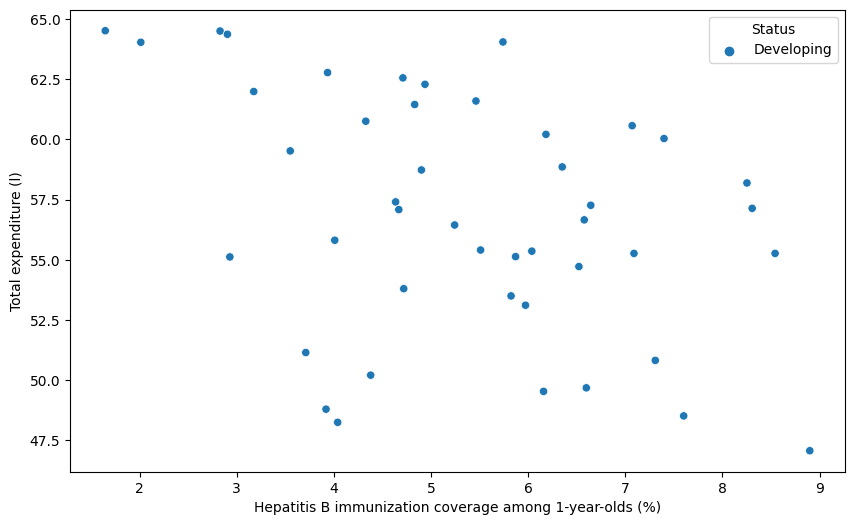

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_expenditure', y='Life_expectancy', hue='Status', data=life_exp_lower_than_65)
plt.xlabel("Hepatitis B immunization coverage among 1-year-olds (%)");
plt.ylabel("Total expenditure (l)")


[<BarContainer object of 88 artists>] ['Total Expenditure'] [<BarContainer object of 88 artists>, <BarContainer object of 88 artists>] ['Life Expectancy', 'Total Expenditure']


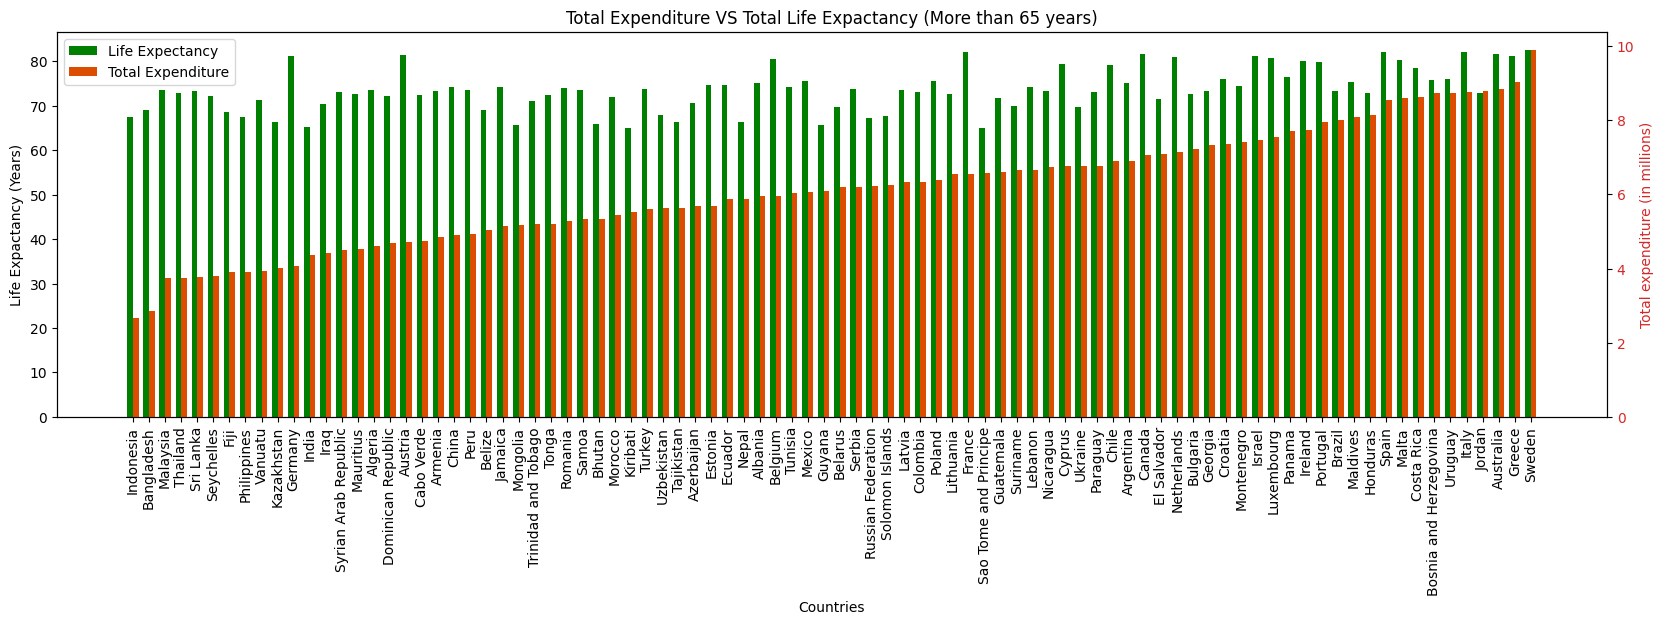

In [44]:
life_exp_bigger_than_65 = life_expectancy_country_df[life_expectancy_country_df['Life_expectancy'] > 65 ]
life_exp_bigger_than_65.sort_values(by='Total_expenditure', ascending= True, inplace= True)
life_exp_bigger_than_65 = life_exp_bigger_than_65.reset_index()
region = life_exp_bigger_than_65.Country.unique().tolist()

fig, ax1 = plt.subplots(figsize=(20, 5))

x_index = np.arange(len(region))
width = 0.35
ax1.bar(x_index-width/2, life_exp_bigger_than_65['Life_expectancy'], width = width, color='green', label = 'Life Expectancy')
plt.xticks(x_index, labels=region)
plt.xticks(rotation = 90)
ax1.set_xlabel("Countries")
ax1.set_ylabel("Life Expactancy (Years)")

ax2 = ax1.twinx()
ax2.bar(x_index+width/2, life_exp_bigger_than_65['Total_expenditure'], width = width, color='#dc4d01', label = 'Total Expenditure')
ax2.set_ylabel('Total expenditure (in millions)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Total Expenditure VS Total Life Expactancy (More than 65 years)")
# Combine the handles and labels from both axes for the legend
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles.extend(handles2)
labels.extend(labels2)
print(handles2, labels2, handles, labels)
# Create the legend
plt.legend(handles, labels, loc='upper left')
plt.show()


Text(0, 0.5, 'Life Expectancy')

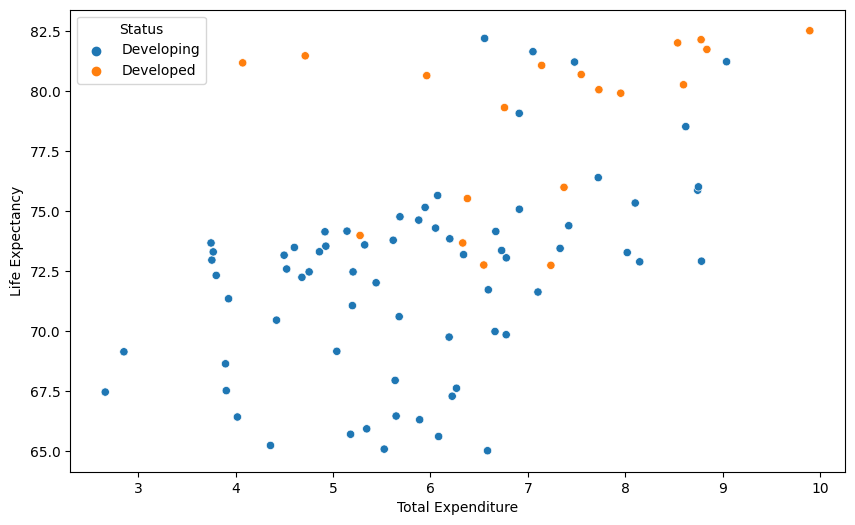

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_expenditure', y='Life_expectancy', hue='Status', data=life_exp_bigger_than_65)
plt.xlabel("Total Expenditure");
plt.ylabel("Life Expectancy")


In [77]:
life_expectancy_country_df

Country  Life_expectancy  Adult_mortality  Infant_deaths   Alcohol  \
0    Afghanistan        58.193750       269.062500      61.000000  0.014375   
1        Albania        75.156250        45.062500       0.687500  4.848750   
2        Algeria        73.486667       114.133333      20.266667  0.406667   
3         Angola        48.793333       328.133333      61.000000  5.740667   
4      Argentina        75.080000       105.333333      10.266667  7.966667   
..           ...              ...              ...            ...       ...   
128      Uruguay        76.013333       120.200000       0.600000  6.172667   
129   Uzbekistan        67.940000       184.866667      22.400000  1.608667   
130      Vanuatu        71.346667       146.200000       0.000000  0.806667   
131       Zambia        53.500000       347.200000      33.866667  2.239333   
132     Zimbabwe        49.533333       382.533333      26.866667  4.482000   

     Percentage_expenditure  HepatitisB      Measles        BMI  \
0                 34.960110   64.562500  1001.312500  15.518750   
1                193.259091   98.000000    53.375000  49.068750   
2                251.930923   78.933333   486.400000  48.026667   
3                108.906953   71.933333   924.733333  17.666667   
4                741.725968   79.000000     2.133333  54.460000   
..                      ...         ...          ...        ...   
128              491.166787   94.266667     0.000000  52.186667   
129               47.331680   90.933333   220.866667  34.146667   
130              301.147462   57.133333    19.666667  43.653333   
131               95.627101   78.600000   588.733333  17.053333   
132               21.721890   70.800000   393.133333  24.693333   

     Under_five_deaths  ...  Total_expenditure  Diphtheria  HIV/AIDS  \
0            84.875000  ...           8.252500   57.687500  0.100000   
1             0.937500  ...           5.945625   98.062500  0.100000   
2            23.466667  ...           4.604000   91.666667  0.100000   
3            85.000000  ...           3.919333   57.733333  2.400000   
4            11.533333  ...           6.912667   92.266667  0.100000   
..                 ...  ...                ...         ...       ...   
128           0.800000  ...           8.750000   91.133333  0.100000   
129          26.266667  ...           5.638000   98.400000  0.213333   
130           0.000000  ...           3.928667   63.800000  0.100000   
131          53.200000  ...           5.824000   81.066667  3.200000   
132          41.400000  ...           6.158667   76.933333  3.200000   

             GDP    Population  Thinness_1-19_years  Thinness_5-9_years  \
0     340.015425  6.646191e+06            14.012500           13.687500   
1    2119.726679  6.969116e+05             1.618750            1.700000   
2    2762.192757  1.039061e+07             6.100000            5.986667   
3    1860.432998  9.026642e+06             6.053333            6.566667   
4    5650.422724  8.947016e+06             1.080000            0.953333   
..           ...           ...                  ...                 ...   
128  5124.907526  2.327786e+06             1.606667            1.553333   
129   551.993393  9.430079e+05             3.153333            3.180000   
130  2114.539610  1.295384e+05             1.573333            1.500000   
131   778.339987  6.666824e+06             6.920000            6.806667   
132   430.465951  7.504269e+06             7.106667            7.086667   

     Income_composition_of_resources  Schooling      Status  
0                           0.415375   8.212500  Developing  
1                           0.709875  12.137500  Developing  
2                           0.691667  12.600000  Developing  
3                           0.453533   7.820000  Developing  
4                           0.792000  16.453333  Developing  
..                               ...        ...         ...  
128                         0.763733  15.213333  Develo

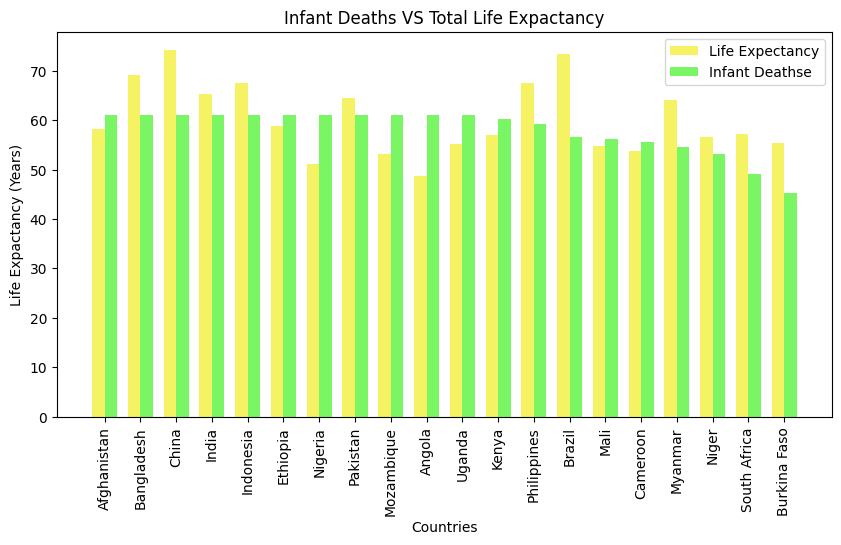

In [47]:
# Group the data by country and calculate average life expectancy
infant = life_expectancy_country_df.groupby(['Country'])['Life_expectancy', 'Infant_deaths'].mean()
infant.sort_values(by='Infant_deaths', ascending=False, inplace= True)
infant = infant.head(20)

infant = infant.reset_index()
region = infant.Country.unique().tolist()

fig = plt.figure(figsize=(10,5))

x_index = np.arange(len(region))
width = 0.35
plt.bar(x_index-width/2, infant['Life_expectancy'], width = width, color='#f5f364')
plt.bar(x_index+width/2, infant['Infant_deaths'], width = width, color='#7af564')
plt.xticks(x_index, labels=region)
plt.xticks(rotation = 90)
plt.xlabel("Countries")
plt.ylabel("Life Expactancy (Years)")
plt.title("Infant Deaths VS Total Life Expactancy")
plt.legend(['Life Expectancy', 'Infant Deathse'])
plt.show()

In [48]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19_years',
       'Thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [179]:
df.head()

Country  Year      Status  Life_expectancy  Adult_mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   Infant_deaths  Alcohol  Percentage_expenditure  HepatitisB  Measles  ...  \
0             61     0.01               71.279624        65.0     1154  ...   
1             61     0.01               73.523582        62.0      492  ...   
2             61     0.01               73.219243        64.0      430  ...   
3             61     0.01               78.184215        67.0     1154  ...   
4             61     0.01                7.097109        68.0     1154  ...   

   Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0   44.0               8.16        65.0       0.1  584.259210  16993354.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  16993354.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   Thinness_1-19_years  Thinness_5-9_years  Income_composition_of_resources  \
0                 15.7                16.3                            0.479   
1                 15.7                16.3                            0.476   
2                 15.7                16.3                            0.470   
3                 15.7                16.3                            0.463   
4                 15.7                16.3                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

In [49]:
a = tempData.head(10)
a


Life_expectancy  Total_expenditure
Country                                      
Sweden           82.526667           9.892667
France           82.206667           6.556000
Italy            82.153333           8.777333
Spain            82.020000           8.536667
Australia        81.746667           8.836667
Canada           81.653333           7.052000
Austria          81.480000           4.715333
Greece           81.233333           9.038667
Israel           81.220000           7.478667
Germany          81.186667           4.073333

In [78]:
df2 = pd.read_csv('csvData.csv')

df2.head()

cca2           name      pop2021      pop2020      pop2050      pop2030  \
0   CN          China  1444216.107  1439323.776  1402405.170  1464340.159   
1   IN          India  1393409.038  1380004.385  1639176.033  1503642.322   
2   US  United States   332915.073   331002.651   379419.102   349641.876   
3   ID      Indonesia   276361.783   273523.615   330904.664   299198.430   
4   PK       Pakistan   225199.937   220892.340   338013.196   262958.794   

       pop2019      pop2015      pop2010      pop2000      pop1990  \
0  1433783.686  1406847.870  1368810.615  1290550.765  1176883.674   
1  1366417.754  1310152.403  1234281.170  1056575.549   873277.798   
2   329064.917   320878.310   309011.475   281710.909   252120.309   
3   270625.568   258383.256   241834.215   211513.823   181413.402   
4   216565.318   199426.964   179424.641   142343.578   107647.921   

       pop1980     pop1970     area   Density  GrowthRate  WorldPercentage  \
0  1000089.235  827601.394  9706961  148.7815      1.0034           0.1834   
1   698952.844  555189.792  3287590  423.8391      1.0097           0.1769   
2   229476.354  209513.341  9372610   35.5200      1.0058           0.0423   
3   147447.836  114793.178  1904569  145.1046      1.0104           0.0351   
4    78054.343   58142.060   881912  255.3542      1.0195           0.0286   

   rank  
0     1  
1     2  
2     3  
3     4  
4     5

In [79]:
df2.shape
df2.rename(columns={'name': 'Country'}, inplace=True)
df2
columns_to_keep = ['Country', 'Density']
df3 = df2[columns_to_keep]
df3



Country   Density
0               China  148.7815
1               India  423.8391
2       United States   35.5200
3           Indonesia  145.1046
4            Pakistan  255.3542
..                ...       ...
227        Montserrat   48.7941
228  Falkland Islands    0.2902
229              Niue    6.2269
230           Tokelau  114.4167
231      Vatican City  800.0000

[232 rows x 2 columns]

In [80]:
life_expectancy_country_df = life_expectancy_country_df.merge(df3, on='Country')
life_expectancy_country_df


Country  Life_expectancy  Adult_mortality  Infant_deaths   Alcohol  \
0    Afghanistan        58.193750       269.062500      61.000000  0.014375   
1        Albania        75.156250        45.062500       0.687500  4.848750   
2        Algeria        73.486667       114.133333      20.266667  0.406667   
3         Angola        48.793333       328.133333      61.000000  5.740667   
4      Argentina        75.080000       105.333333      10.266667  7.966667   
..           ...              ...              ...            ...       ...   
124      Uruguay        76.013333       120.200000       0.600000  6.172667   
125   Uzbekistan        67.940000       184.866667      22.400000  1.608667   
126      Vanuatu        71.346667       146.200000       0.000000  0.806667   
127       Zambia        53.500000       347.200000      33.866667  2.239333   
128     Zimbabwe        49.533333       382.533333      26.866667  4.482000   

     Percentage_expenditure  HepatitisB      Measles        BMI  \
0                 34.960110   64.562500  1001.312500  15.518750   
1                193.259091   98.000000    53.375000  49.068750   
2                251.930923   78.933333   486.400000  48.026667   
3                108.906953   71.933333   924.733333  17.666667   
4                741.725968   79.000000     2.133333  54.460000   
..                      ...         ...          ...        ...   
124              491.166787   94.266667     0.000000  52.186667   
125               47.331680   90.933333   220.866667  34.146667   
126              301.147462   57.133333    19.666667  43.653333   
127               95.627101   78.600000   588.733333  17.053333   
128               21.721890   70.800000   393.133333  24.693333   

     Under_five_deaths  ...  Diphtheria  HIV/AIDS          GDP    Population  \
0            84.875000  ...   57.687500  0.100000   340.015425  6.646191e+06   
1             0.937500  ...   98.062500  0.100000  2119.726679  6.969116e+05   
2            23.466667  ...   91.666667  0.100000  2762.192757  1.039061e+07   
3            85.000000  ...   57.733333  2.400000  1860.432998  9.026642e+06   
4            11.533333  ...   92.266667  0.100000  5650.422724  8.947016e+06   
..                 ...  ...         ...       ...          ...           ...   
124           0.800000  ...   91.133333  0.100000  5124.907526  2.327786e+06   
125          26.266667  ...   98.400000  0.213333   551.993393  9.430079e+05   
126           0.000000  ...   63.800000  0.100000  2114.539610  1.295384e+05   
127          53.200000  ...   81.066667  3.200000   778.339987  6.666824e+06   
128          41.400000  ...   76.933333  3.200000   430.465951  7.504269e+06   

     Thinness_1-19_years  Thinness_5-9_years  Income_composition_of_resources  \
0              14.012500           13.687500                         0.415375   
1               1.618750            1.700000                         0.709875   
2               6.100000            5.986667                         0.691667   
3               6.053333            6.566667                         0.453533   
4               1.080000            0.953333                         0.792000   
..                   ...                 ...                              ...   
124             1.606667            1.553333                         0.763733   
125             3.153333            3.180000                         0.615133   
126             1.573333            1.500000                         0.462533   
127             6.920000            6.806667                         0.493267   
128             7.106667            7.086667                         0.434600   

     Schooling      Status  Density  
0     8.212500  Developing  61.0757  
1    12.137500  Developing  99.9351  
2    12.600000  Developing  18.7328  
3     7.820000  Developing  27.2187  
4    16.453333  Developing  16.4026  
..         ...         ...      ...  
124  15.213333  Developing  19.2514  
125  11.613333  D

[<BarContainer object of 129 artists>] ['Density'] [<BarContainer object of 129 artists>, <BarContainer object of 129 artists>] ['Life Expectancy', 'Density']


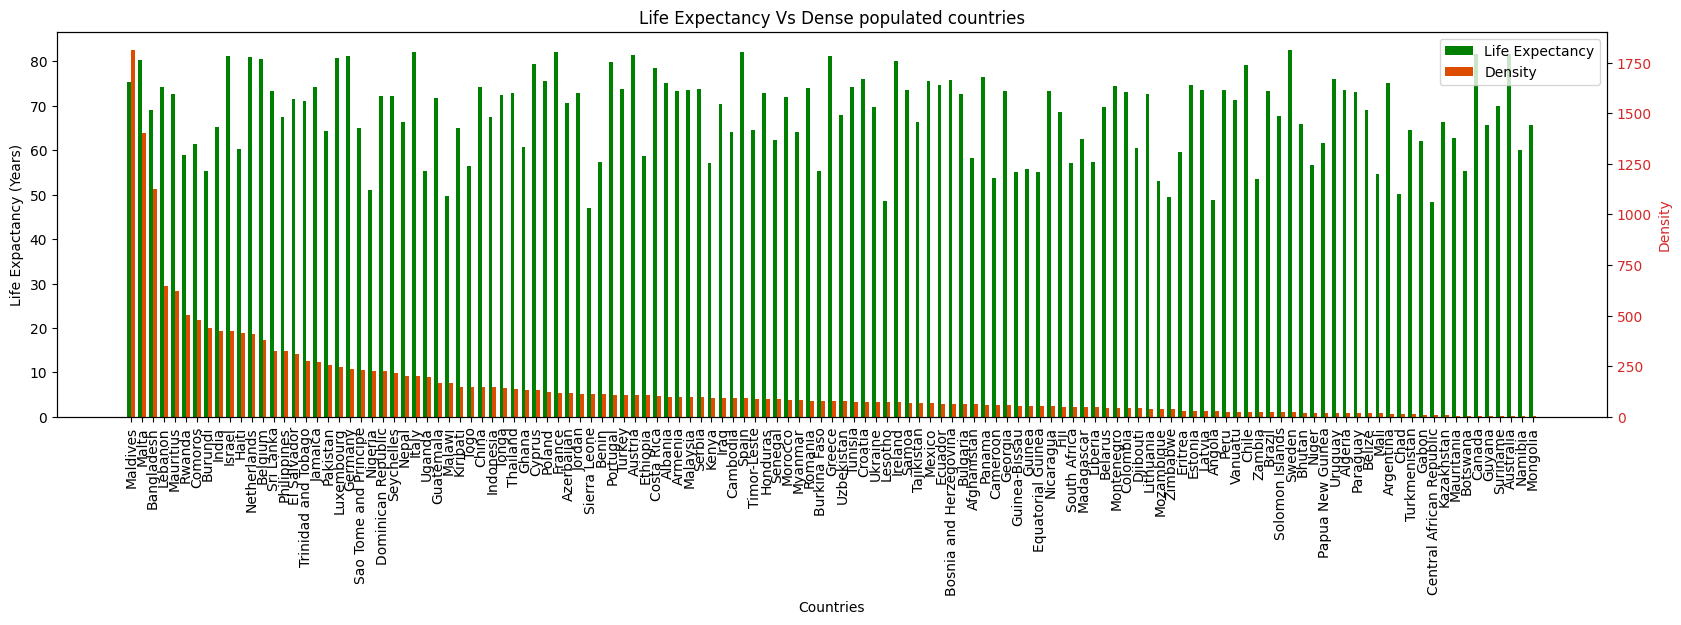

In [81]:
most_dense_countries = life_expectancy_country_df.groupby(['Country'])['Life_expectancy', 'Density'].mean()
most_dense_countries = most_dense_countries.reset_index()
most_dense_countries.sort_values(by='Density', ascending=False, inplace= True)
region = most_dense_countries.Country.unique().tolist()

fig, ax1 = plt.subplots(figsize=(20, 5))

x_index = np.arange(len(region))
width = 0.35
ax1.bar(x_index-width/2, most_dense_countries['Life_expectancy'], width = width, color='green', label = 'Life Expectancy')
plt.xticks(x_index, labels=region)
plt.xticks(rotation = 90)
ax1.set_xlabel("Countries")
ax1.set_ylabel("Life Expactancy (Years)")


ax2 = ax1.twinx()
ax2.bar(x_index+width/2, most_dense_countries['Density'], width = width, color='#dc4d01', label = 'Density')
ax2.set_ylabel('Density', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Life Expectancy Vs Dense populated countries")
# Combine the handles and labels from both axes for the legend
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles.extend(handles2)
labels.extend(labels2)
print(handles2, labels2, handles, labels)
# Create the legend
plt.legend(handles, labels, loc='upper right')
plt.show()

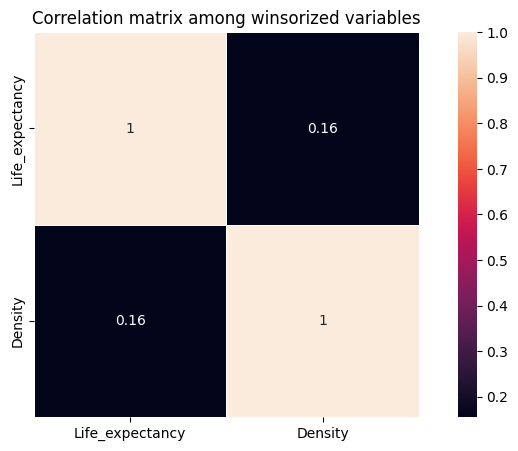

In [83]:
plt.figure(figsize=(10,5))
sns.heatmap(most_dense_countries.corr(), square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()

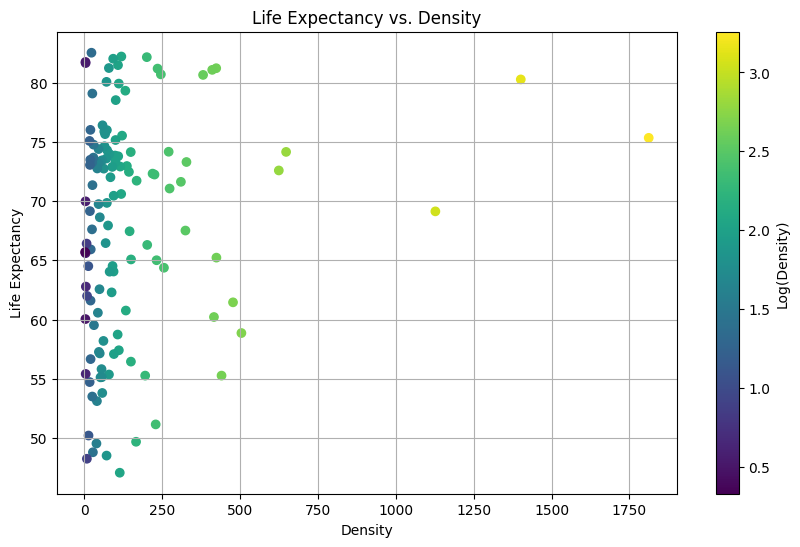

In [92]:
# Scatter plot of life expectancy versus GDP (Gross Domestic Product per capita (in USD))
plt.figure(figsize=(10, 6))
plt.scatter(most_dense_countries['Density'], most_dense_countries['Life_expectancy'], c=np.log10(most_dense_countries['Density']), cmap='viridis')
plt.title('Life Expectancy vs. Density')
plt.xlabel('Density')
plt.ylabel('Life Expectancy')
plt.colorbar(label='Log(Density)')
plt.grid(True) 
plt.show()
